In [1]:
# Importamos librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Análisis de Spotify
Preguntas interesantes para considerar:
- El objetivo es poder estimar si un tema nuevo del gusto de la persona que tiene esta playlist activa. En este caso la variable label corresponde a nuestra variable de salida a analizar

In [2]:
# Análisis exploratorio inicial
playlist = pd.read_csv('data_playlist.csv')
playlist.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1


In [3]:
playlist.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
label               0
dtype: int64

In [4]:
# Vemos primero el tipo de información que tiene cada variable
print("columnas, filas: ", playlist.shape, "\n")
playlist.info()

columnas, filas:  (750, 14) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
 13  label             750 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 82.2 KB


- Revisamos el detalle de los features del dataset: [Spotify for Developers](https://developer.spotify.com/documentation/web-api/reference/get-several-audio-features)

De `.info()` podemos sacar que:
- No existen valores no nulos, por lo tanto, no habría que rellenarlos.
- Todos los features son numéricos, aunque no podríamos especificar el tipo todavía.

#### Acousticness

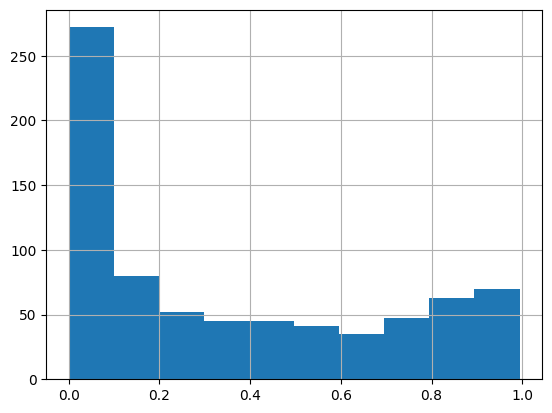

In [5]:
playlist.acousticness.hist();

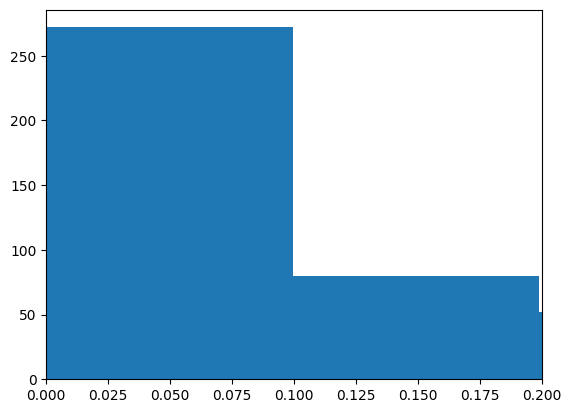

In [6]:
# Hacemos un zoom cerca en el rango 0.0-0.2:
plt.hist(x=playlist.acousticness, bins=10)
plt.xlim(left=0.0, right=0.2)
plt.show()

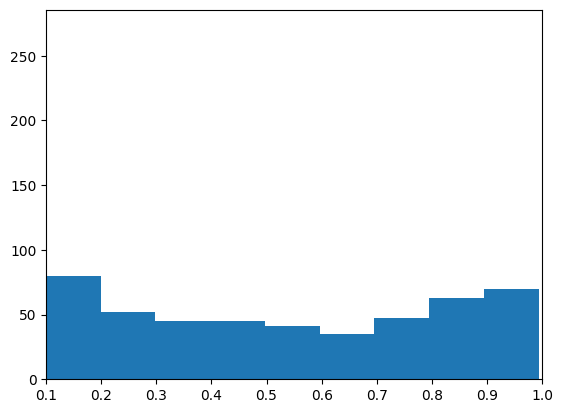

In [7]:
# Hacemos un zoom cerca en el rango 0.0-0.2:
plt.hist(x=playlist.acousticness, bins=10)
plt.xlim(left=0.1, right=1.0)
plt.show()

- La gran mayoría de valores se encuentran debajo de 0.1.
- El resto puede considerarse distribuido de manera uniforme.

In [8]:
playlist.acousticness.value_counts().sort_values(ascending=False)

acousticness
0.99200    7
0.99000    5
0.58600    4
0.19400    4
0.74100    4
          ..
0.03850    1
0.00419    1
0.04350    1
0.50600    1
0.01550    1
Name: count, Length: 596, dtype: int64

- Valores continuos entre 0 y 1.
- La mayoría de los valores son bajos.
- A priori, no tiene una distribución conocida.
- ¿Existe alguna manera de explicar haciendo binning?
- ¿Sirve enmascarar la columna en valores menores y mayores a 0.1 para darle un punto de vista de feature categórico?

#### Danceability

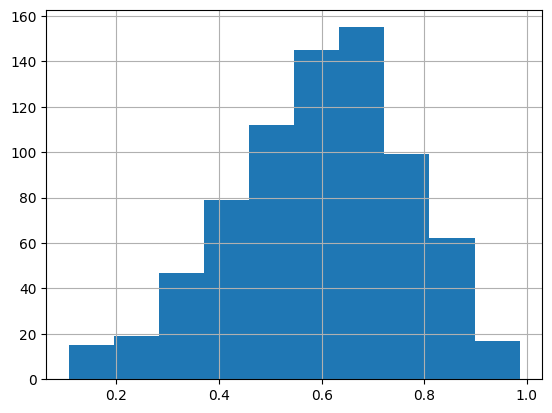

In [9]:
playlist.danceability.hist();

In [10]:
from sklearn.preprocessing import PowerTransformer

In [11]:
# Aplicamos Box-Cox a los valores para ver si mejora un poco la distribución
bc = PowerTransformer(method='box-cox')
danc_bc = bc.fit_transform(playlist.danceability.values.reshape((750,1)))

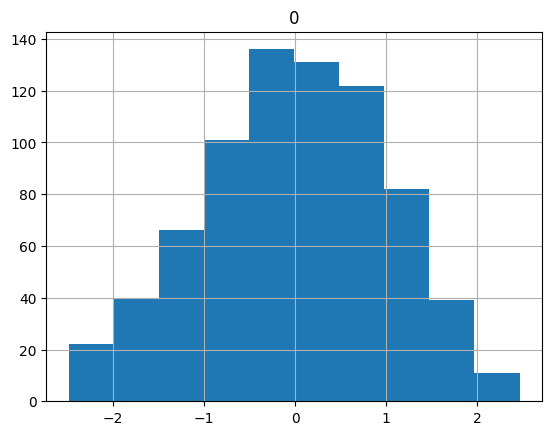

In [12]:
danc_bc = pd.DataFrame(danc_bc)
danc_bc.hist();

In [13]:
# Calculamos el skewness
danc_bc.skew()

0   -0.08915
dtype: float64

- Valores continuos entre 0 y 1.
- Tiene skewness.
- Mejora el skewness luego de una transformación con Box-Cox.

#### Duration

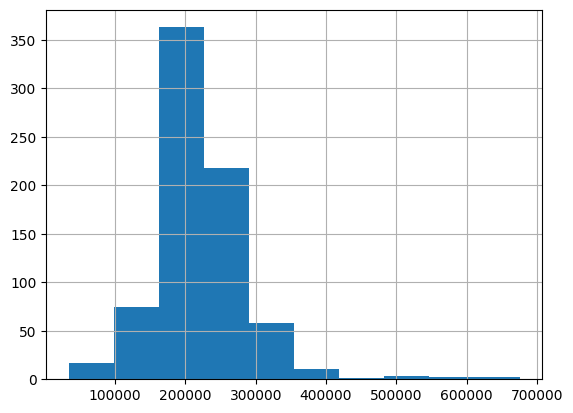

In [14]:
playlist.duration.hist();

In [15]:
# Vemos el skewness inicial
playlist.duration.skew()

1.5762310506305088

In [16]:
# Realizamos una función que aplique Box-Cox a los valores para ver si mejora un poco la distribución
def bc_transf(feature):
    bc = PowerTransformer(method='box-cox')
    feat_bc = bc.fit_transform(playlist[feature].values.reshape((750,1)))
    feat_bc = pd.DataFrame(feat_bc)
    feat_bc.hist()
    plt.title(f"El feature {feature} con Box-Cox tiene skewness {feat_bc.skew()}")
    return feat_bc

,0
0,-2.175365
1,-0.130681
2,0.015353
3,-1.390479
4,-0.556411
...,...
745,1.656701
746,-0.035172
747,-1.605952
748,0.519389


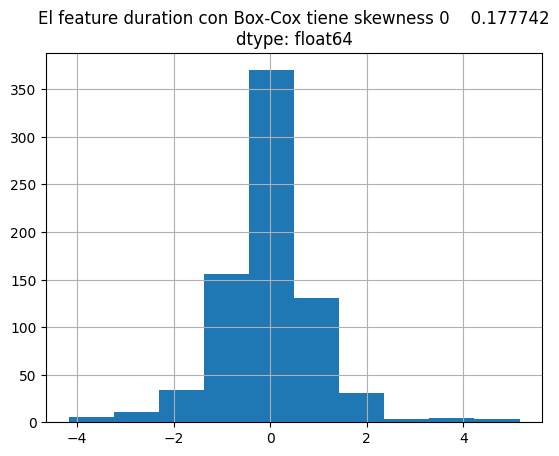

In [17]:
bc_transf('duration')

- Se ve una mejora en el skewness de la pieza luego de la transformación.

#### Energy

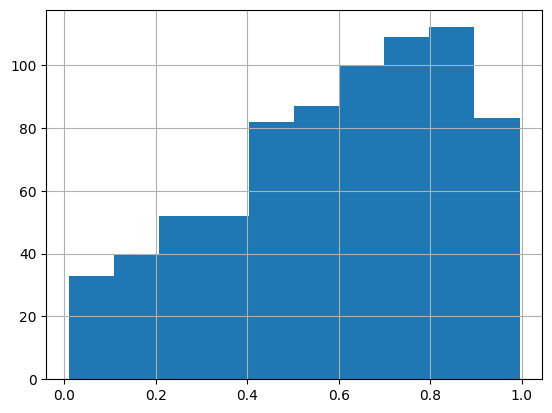

In [18]:
playlist.energy.hist();

In [19]:
playlist.energy.skew()

-0.4587645952079551

,0
0,-0.331216
1,0.043670
2,-0.591460
3,-1.463659
4,-0.575837
...,...
745,1.431606
746,1.103544
747,-1.128036
748,0.915508


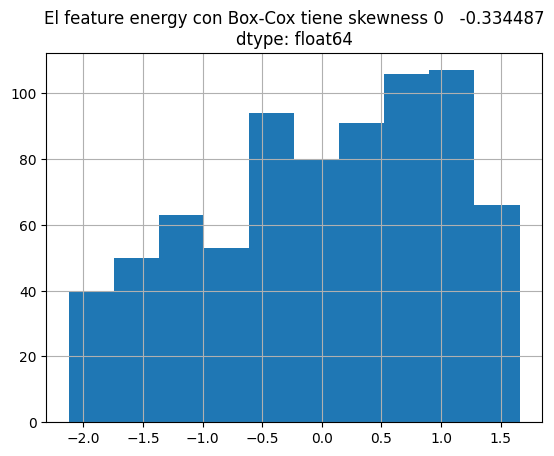

In [20]:
# Analizamos lo mismo en esta feature
bc_transf('energy')

#### Instrumentalness

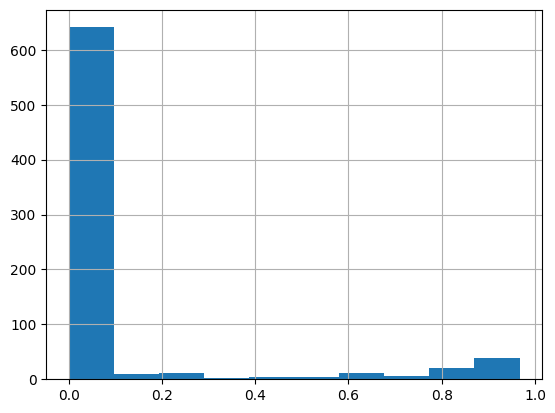

In [21]:
playlist.instrumentalness.hist();

In [22]:
playlist.instrumentalness.value_counts().sort_values(ascending=False)

instrumentalness
0.000000    290
0.000010      3
0.000229      3
0.872000      3
0.000006      2
           ... 
0.000002      1
0.005310      1
0.002230      1
0.520000      1
0.003140      1
Name: count, Length: 431, dtype: int64

#### Key

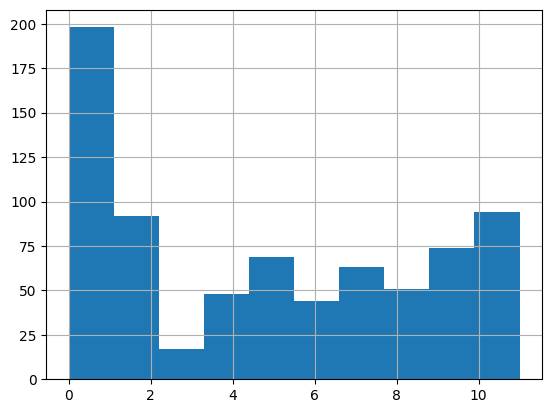

In [23]:
playlist.key.hist();

In [24]:
playlist.key.value_counts().sort_values(ascending=False)

key
0     113
2      92
1      85
9      74
5      69
7      63
8      51
4      48
10     48
11     46
6      44
3      17
Name: count, dtype: int64

#### Liveness

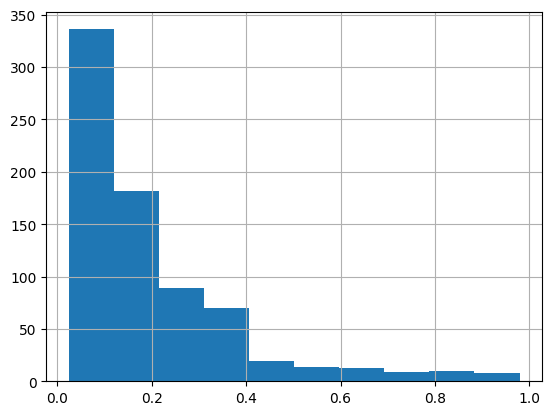

In [25]:
playlist.liveness.hist();

In [26]:
playlist.liveness.skew()

2.1562404755479365

,0
0,-0.389576
1,0.827661
2,-0.189134
3,0.357849
4,-1.235416
...,...
745,-0.214012
746,-0.632363
747,1.195898
748,-0.252327


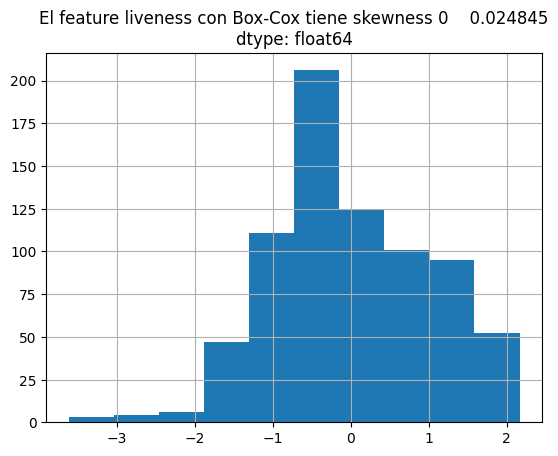

In [27]:
# Transformamos la feature con Box-Cox:
bc_transf('liveness')

#### Loudness

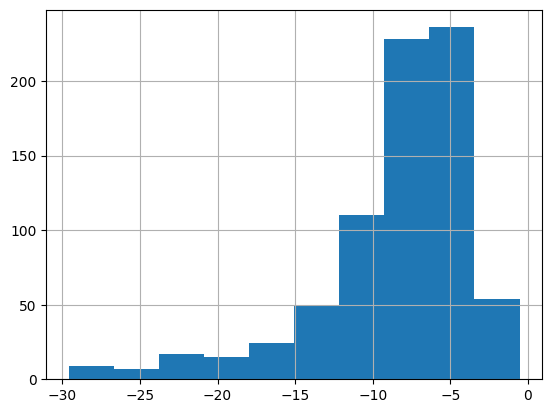

In [28]:
playlist.loudness.hist();

In [29]:
playlist.loudness.skew()

-1.6931146926686604

In [30]:
# Como es negativo, vamos a crear un Yeo-Johnson transformer
def yj_transf(feature):
    yj = PowerTransformer(method='yeo-johnson')
    feat_yj = yj.fit_transform(playlist[feature].values.reshape((750,1)))
    feat_yj = pd.DataFrame(feat_yj)
    feat_yj.hist()
    plt.title(f"El feature {feature} con Yeo-Johnson tiene skewness {feat_yj.skew()}")
    return feat_yj

,0
0,-1.303451
1,0.100206
2,-0.445834
3,-0.759268
4,-0.198927
...,...
745,1.078487
746,1.483683
747,-0.078905
748,0.111864


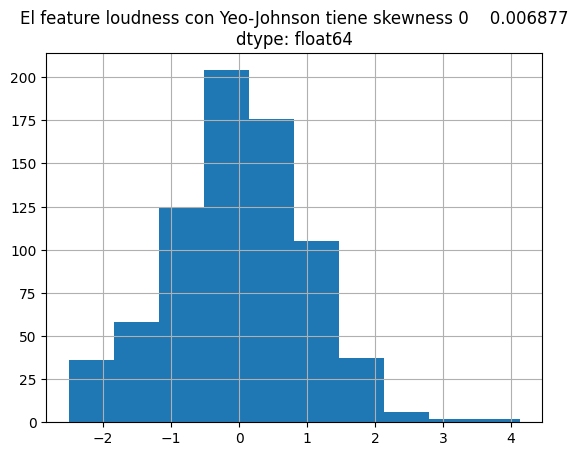

In [31]:
yj_transf('loudness')

- Mejora notablemente.

#### Mode

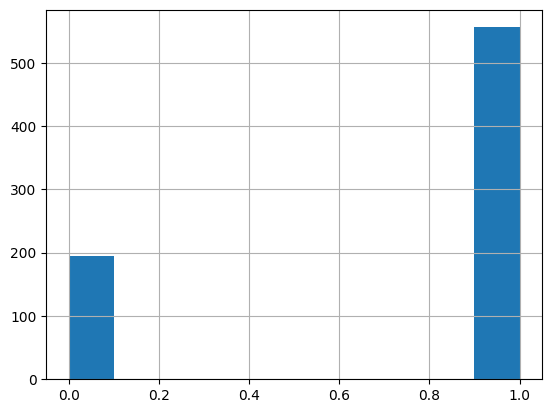

In [32]:
playlist['mode'].hist();

In [33]:
playlist['mode'].value_counts()

mode
1    556
0    194
Name: count, dtype: int64

#### Speechiness

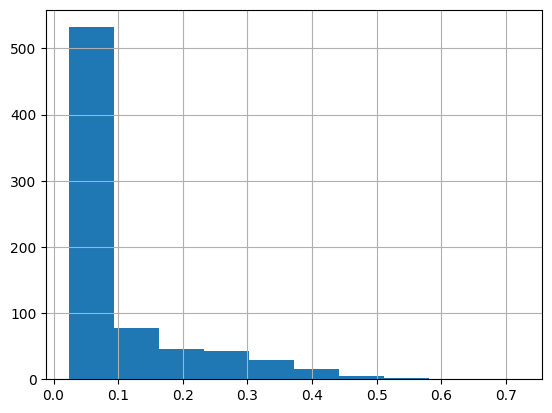

In [34]:
playlist.speechiness.hist();

In [35]:
playlist.speechiness.skew()

2.0403697815970148

,0
0,-0.376482
1,-1.085454
2,-1.306022
3,-0.442445
4,-0.862557
...,...
745,0.016599
746,-0.021765
747,-1.026195
748,-0.728710


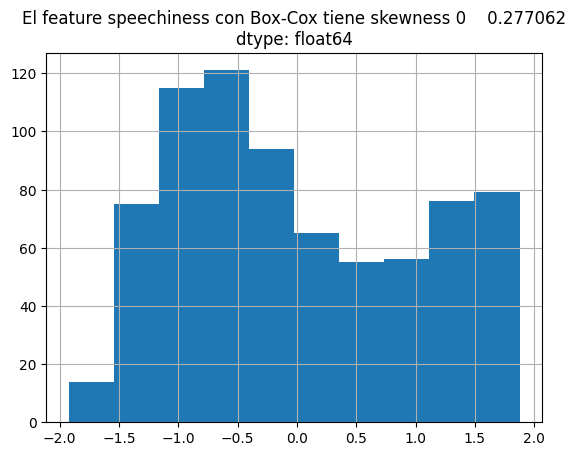

In [36]:
bc_transf('speechiness')

- Se ve también una mejora en la transformación.

#### Tempo

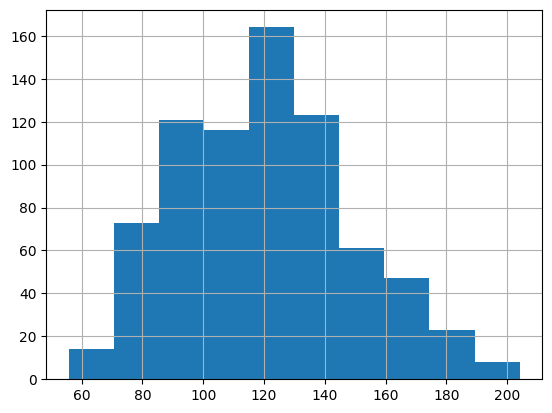

In [37]:
playlist.tempo.hist();

In [38]:
playlist.tempo.skew()

0.3347625436886502

,0
0,0.055777
1,0.198307
2,0.727922
3,-0.303071
4,-1.058360
...,...
745,-0.224569
746,1.343860
747,0.670711
748,0.858672


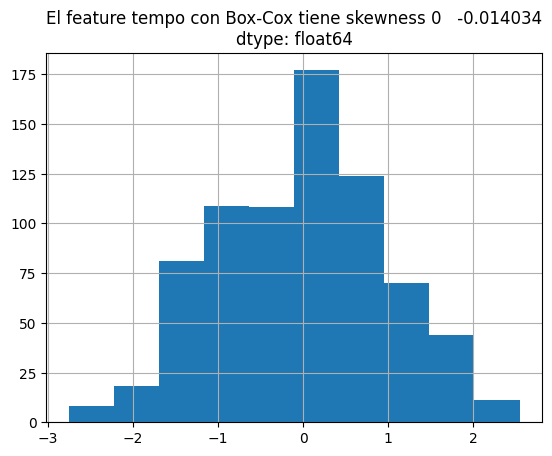

In [39]:
bc_transf('tempo')

#### Time Signature

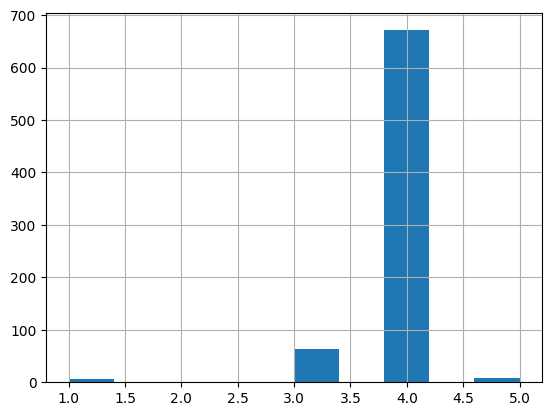

In [40]:
playlist.time_signature.hist();

In [41]:
playlist.time_signature.value_counts()

time_signature
4    671
3     64
5      9
1      6
Name: count, dtype: int64

#### Valence

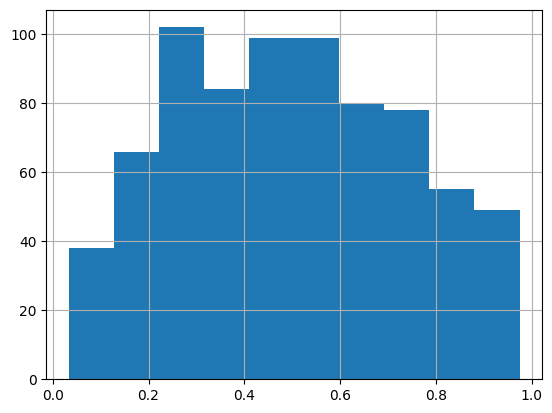

In [42]:
playlist.valence.hist();

In [43]:
playlist.valence.skew()

0.10481159565511211

#### Label

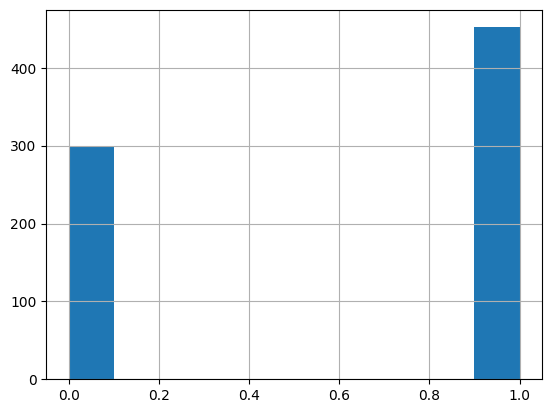

In [44]:
playlist.label.hist();

In [45]:
playlist.label.value_counts()

label
1    452
0    298
Name: count, dtype: int64

- Si bien existe una diferencia entre los dos labels, se puede decir que no está desbalanceado.

## Análisis detallado

In [46]:
playlist.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,220112.733333,0.594188,0.100245,4.829333,0.203376,-8.509339,0.741333,0.098966,120.405761,3.902667,0.497321,0.602667
std,0.338405,0.172036,65587.690483,0.253301,0.259921,3.636001,0.177609,5.039488,0.438194,0.104715,28.378116,0.400091,0.239615,0.489673
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.000000,0.024000,-29.601000,0.000000,0.023400,55.747000,1.000000,0.033200,0.000000
25%,0.037150,0.480000,185490.250000,0.423250,0.000000,1.000000,0.094550,-10.173500,0.000000,0.035900,98.998000,4.000000,0.297000,0.000000
50%,0.244500,0.606000,215108.500000,0.631500,0.000010,5.000000,0.129000,-7.270000,1.000000,0.048750,120.104500,4.000000,0.483000,1.000000
75%,0.678500,0.715750,244236.750000,0.804750,0.002245,8.000000,0.264750,-5.097750,1.000000,0.113000,138.074750,4.000000,0.684500,1.000000
max,0.994000,0.986000,675360.000000,0.995000,0.967000,11.000000,0.979000,-0.533000,1.000000,0.721000,204.162000,5.000000,0.975000,1.000000


In [47]:
numericas = ['acousticness', 'danceability', 'duration', 'energy', 'instrumentalness','liveness', 'loudness', 'speechiness', 'tempo', 'valence']
categoricas = ['key', 'mode', 'time_signature']

In [48]:
playlist[numericas].skew().sort_values()

loudness           -1.693115
energy             -0.458765
danceability       -0.311981
valence             0.104812
tempo               0.334763
acousticness        0.534804
duration            1.576231
speechiness         2.040370
liveness            2.156240
instrumentalness    2.488166
dtype: float64

In [49]:
# Usamos una función útil para ver todas las distribuciones
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

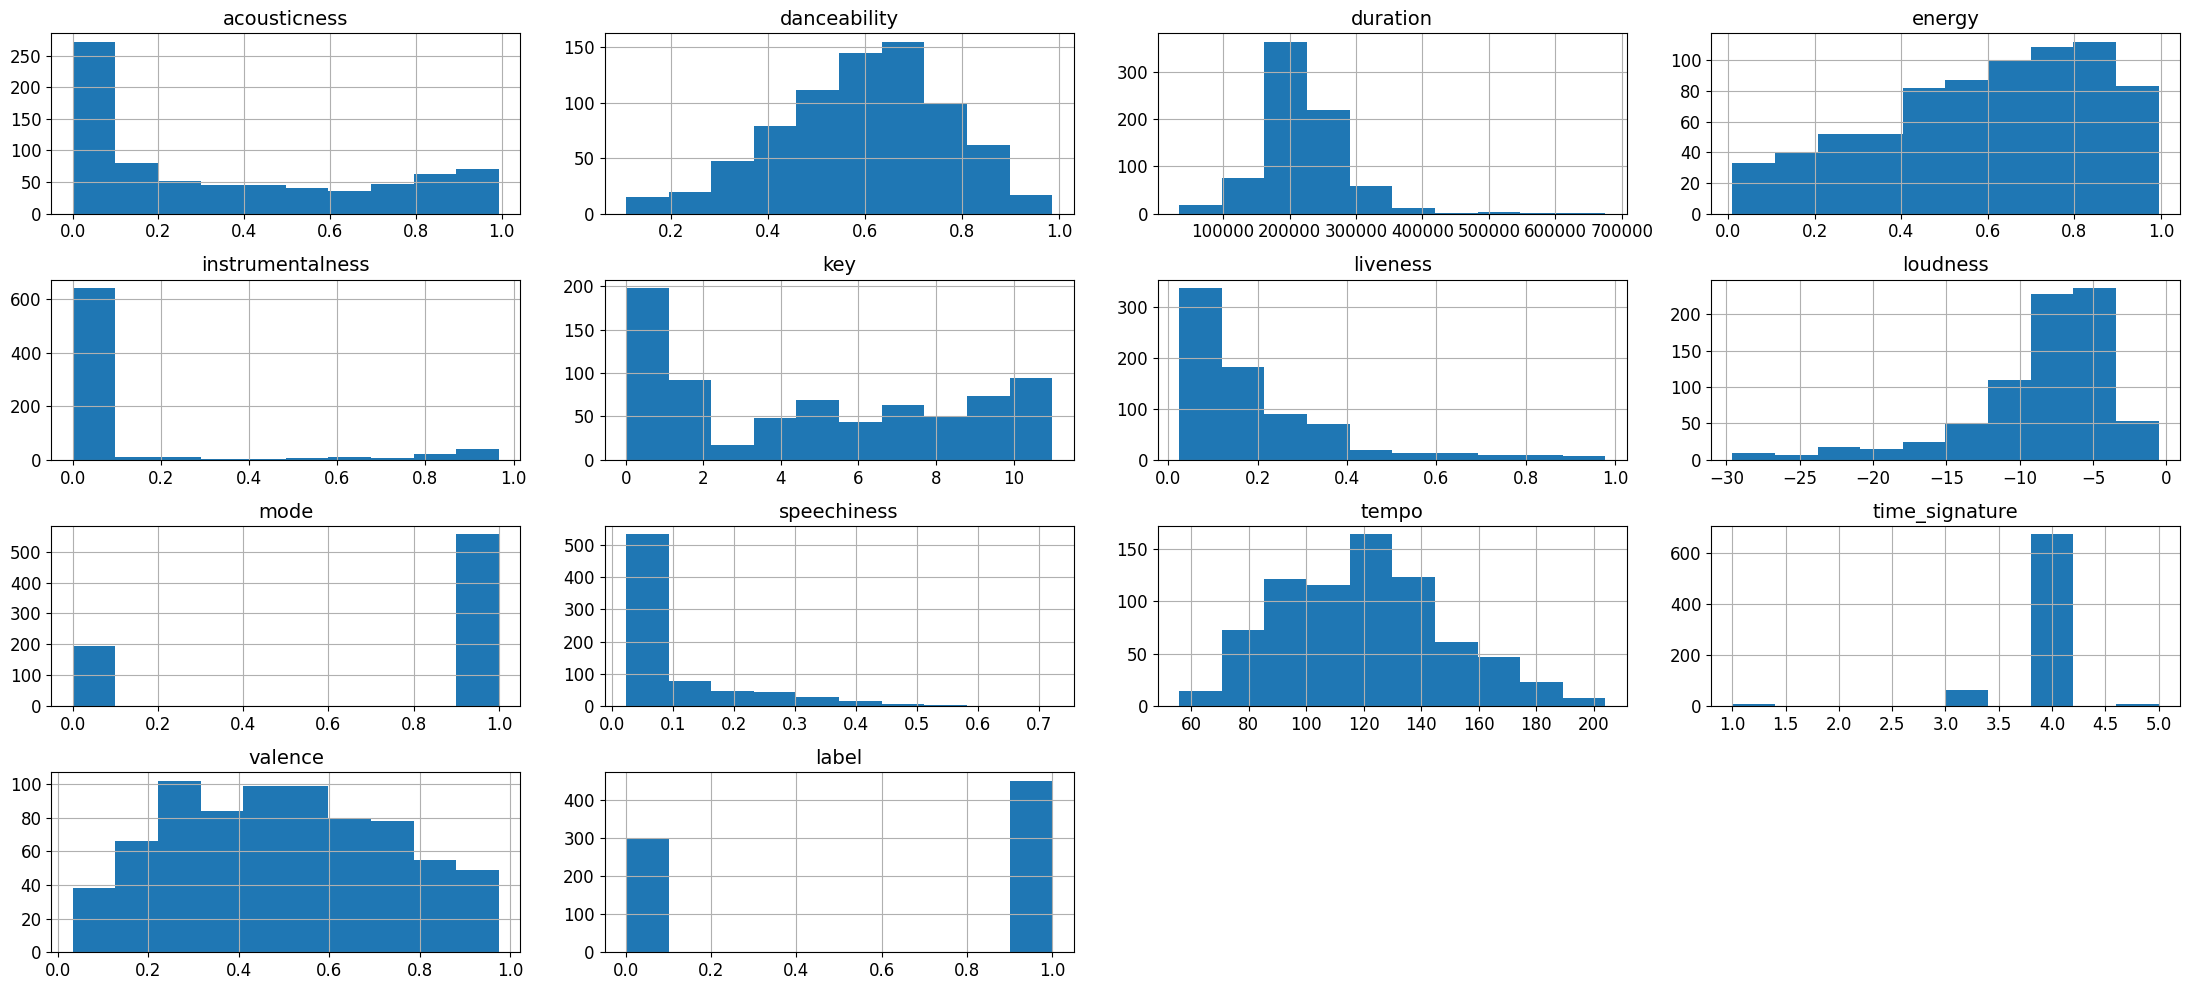

In [50]:
display_dataset_distributions(playlist)

In [51]:
# Vemos como está la correlación de las variables
playlist.corr()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
acousticness,1.000000,-0.417974,0.054988,-0.781691,0.331659,-0.065184,-0.140326,-0.695163,0.111980,-0.215614,-0.149472,-0.205854,-0.233485,0.479307
danceability,-0.417974,1.000000,-0.231120,0.360971,-0.238865,0.055302,-0.115735,0.396021,-0.058461,0.272283,0.064002,0.222486,0.483361,-0.368501
duration,0.054988,-0.231120,1.000000,-0.093435,0.161803,-0.002089,-0.002576,-0.179952,-0.011989,-0.110645,-0.052321,-0.003030,-0.256984,0.138562
energy,-0.781691,0.360971,-0.093435,1.000000,-0.267846,0.066970,0.235887,0.830081,-0.102567,0.173371,0.197741,0.241667,0.364495,-0.459088
instrumentalness,0.331659,-0.238865,0.161803,-0.267846,1.000000,-0.020726,-0.050720,-0.429529,-0.032180,-0.145104,-0.081531,-0.024597,-0.228774,0.133523
key,-0.065184,0.055302,-0.002089,0.066970,-0.020726,1.000000,-0.055710,0.009126,-0.158468,0.081137,-0.084476,0.096863,0.068146,-0.075631
liveness,-0.140326,-0.115735,-0.002576,0.235887,-0.050720,-0.055710,1.000000,0.154176,-0.023585,0.106747,-0.008093,0.037201,0.051110,-0.108682
loudness,-0.695163,0.396021,-0.179952,0.830081,-0.429529,0.009126,0.154176,1.000000,-0.048111,0.188873,0.188127,0.169130,0.294852,-0.424345
mode,0.111980,-0.058461,-0.011989,-0.102567,-0.032180,-0.158468,-0.023585,-0.048111,1.000000,-0.118390,0.013911,-0.044799,0.051939,0.080375
speechiness,-0.215614,0.272283,-0.110645,0.173371,-0.145104,0.081137,0.106747,0.188873,-0.118390,1.000000,0.139993,0.088062,0.101257,-0.480931


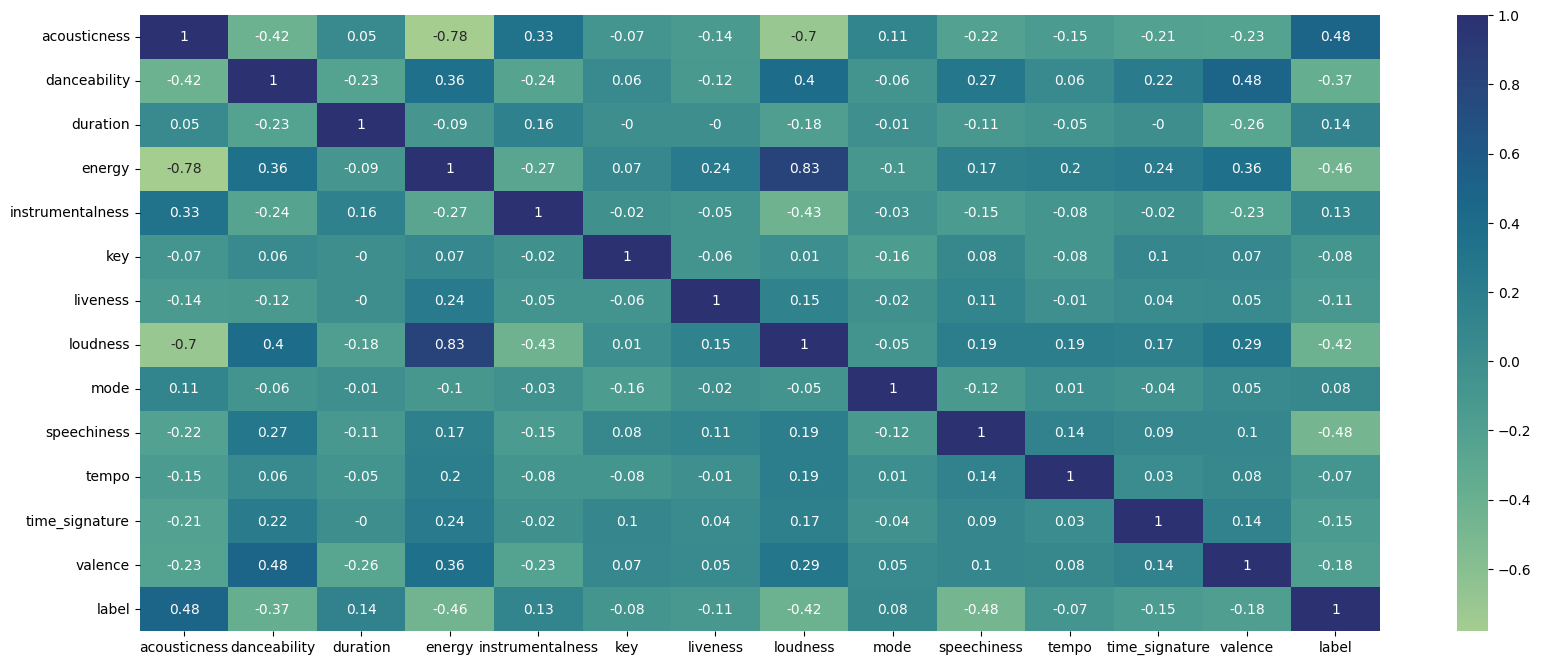

In [52]:
# Matriz de correlación, redondeo a 2 decimales
correlation_matrix = playlist.corr().round(2)
fig,axes = plt.subplots(1,1,figsize=(20,8))
sns.heatmap(data=correlation_matrix, annot=True,ax=axes, cmap='crest');

- Podemos decir que con un valor de correlación arriba del 75%, esos dos features tienen cierta correlación.
- Podemos tomar `acousticness` con `energy` y `loudness` con `energy`.

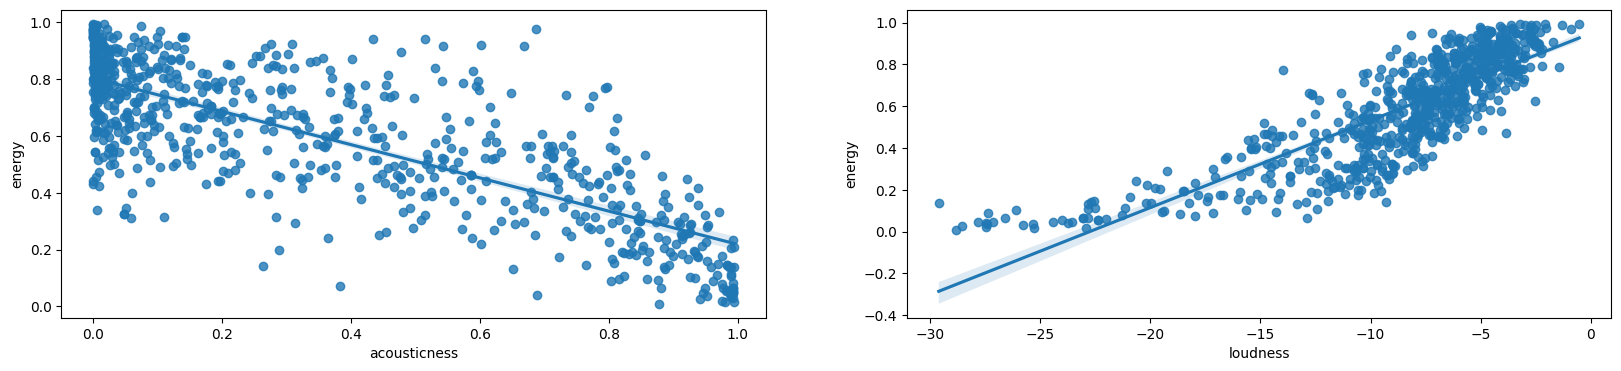

In [53]:
fig,axes = plt.subplots(1,2,figsize=(20,4))
sns.regplot(x="acousticness", y="energy", data=playlist, order=1,ax=axes[0])
sns.regplot(x="loudness", y="energy", data=playlist, order=1,ax=axes[1]);

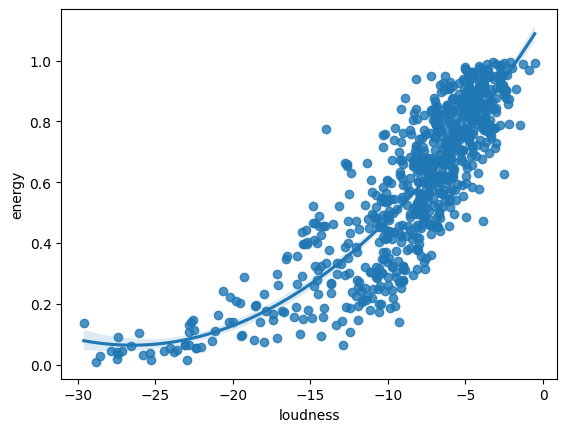

In [54]:
# Vemos si energy y loudness tienen una relación de orden mayor
sns.regplot(x="loudness", y="energy", data=playlist, order=2);

- Se adapta mejor a este modelo de orden 2.

- Ya en un grado menor, con la correlación en 70% podemos tomar las variables `loudness` y `acousticness`. Aunque el resultado no se ve prometedor.

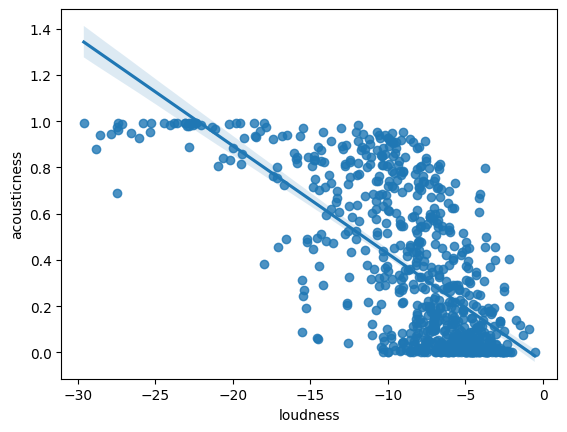

In [55]:
sns.regplot(x="loudness", y="acousticness", data=playlist, order=1);

### Identificación de variables

In [57]:
# Variables de entrada
entrada = playlist.drop('label', axis=1)
salida = playlist.label

#### Boxplot

In [58]:
entre_0y1 = playlist[numericas].drop(['duration','loudness', 'tempo'], axis=1)
plt.figure(figsize=(20,8))
#sns.boxplot(entre_0y1);

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

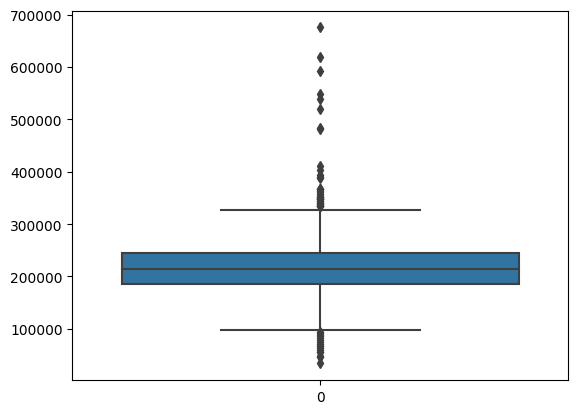

In [59]:
sns.boxplot(data=playlist['duration']);

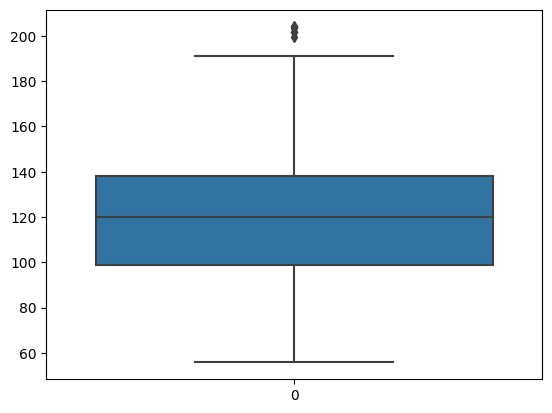

In [60]:
sns.boxplot(data=playlist['tempo']);

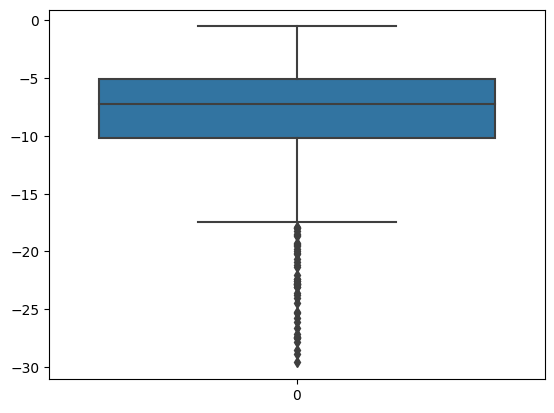

In [61]:
sns.boxplot(data=playlist['loudness']);

## Pruebas de modelos

In [67]:
# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Evaluación de modelos de prueba
from sklearn.metrics import roc_auc_score, auc, roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report

# Partición de train-test set
from sklearn.model_selection import train_test_split

# Escalado de features
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import scipy.stats as stats

# Crear datasets
from sklearn.datasets import make_regression

# Esquemas de entrenamiento
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.model_selection import cross_val_score

In [63]:
playlist.columns

Index(['acousticness', 'danceability', 'duration', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'label'],
      dtype='object')

In [64]:
# Diferenciamos en X y en y las variables
X = playlist.drop(columns='label')
y = playlist.label

In [65]:
# Primero realizamos el split
# Particionamos en train y test porque tenemos pocos datos
train_ratio = 0.80
# validation_ratio = 0.20
test_ratio = 1 - train_ratio

# En SKLearn no hay una función para hacer todo en un paso así que lo hacemos en 2.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=(validation_ratio/(validation_ratio+test_ratio))) 

print("Train shape: ", X_train.shape,y_train.shape)
# print("Val: ",X_val.shape,y_val.shape)
print("Test shape:", X_test.shape,y_test.shape)

Train shape:  (600, 13) (600,)
Test shape: (150, 13) (150,)


In [66]:
# Vamos a revisar qué tiene cada split
print(f"Contamos los labels de train:\n{y_train.value_counts()/len(y_train)}")
print(f"Contamos los labels de test: \n{y_test.value_counts()/len(y_test)}")

Contamos los labels de train:
label
1    0.593333
0    0.406667
Name: count, dtype: float64
Contamos los labels de test: 
label
1    0.64
0    0.36
Name: count, dtype: float64


In [68]:
def outlier_diagnostic_plots(playlist, variable):
    fig,axes = plt.subplots(1,3,figsize=(20,4))

    # histograma
    sns.histplot(playlist[variable], bins=30,ax=axes[0], kde=True)
    axes[0].set_title('Histograma')
    
    # qqplot    
    stats.probplot(playlist[variable], dist="norm", plot=axes[1])
    axes[1].set_title('QQ')
    
    # boxplot    
    sns.boxplot(y=playlist[variable],ax=axes[2])
    axes[2].set_title('Box&Whiskers')

    fig.suptitle(variable, fontsize=16)

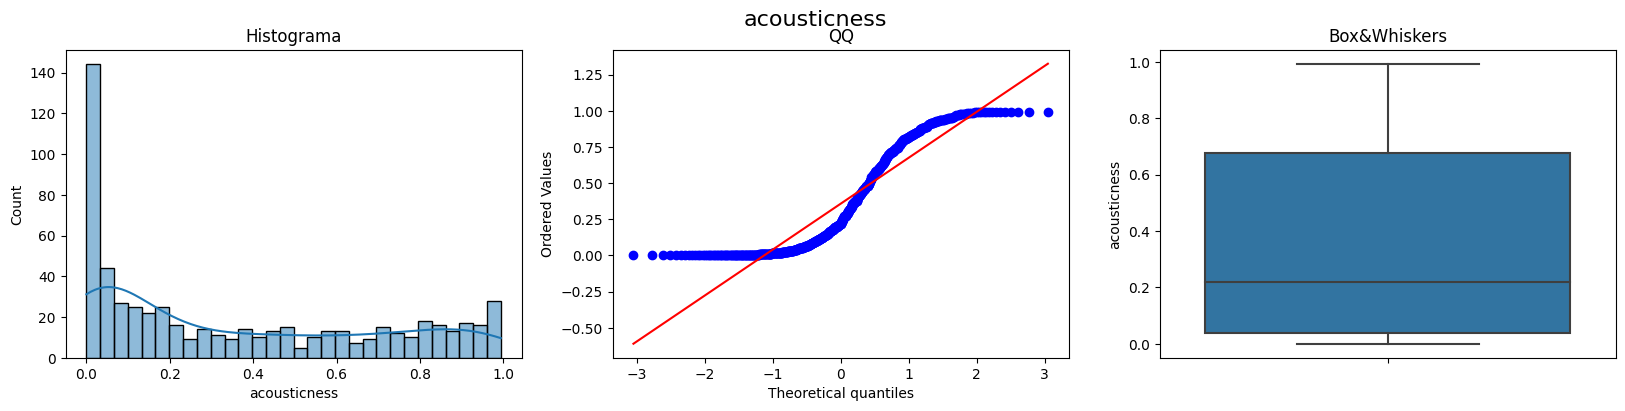

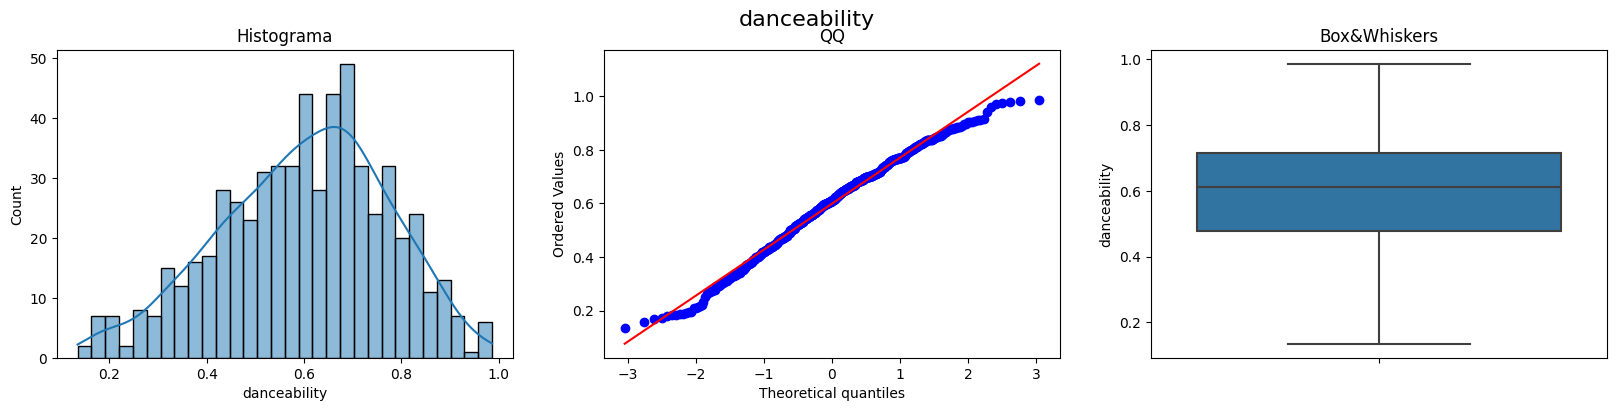

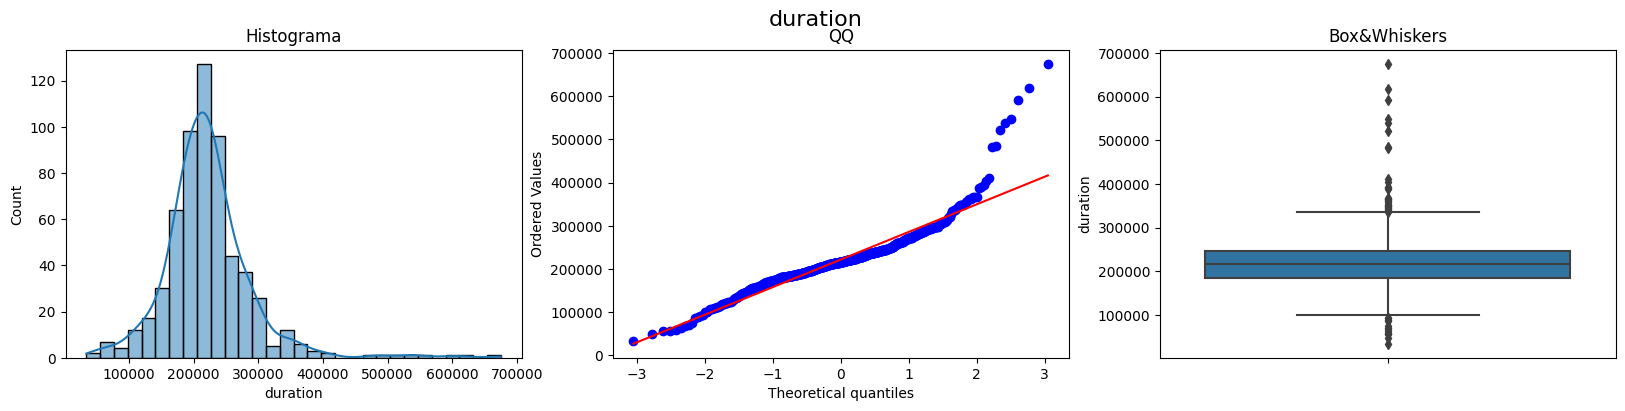

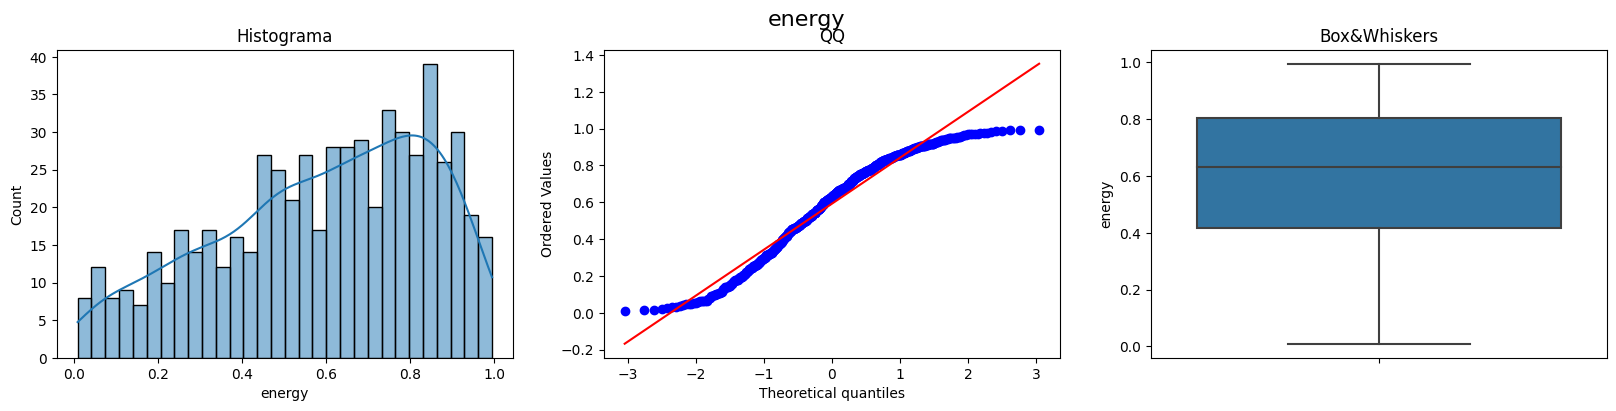

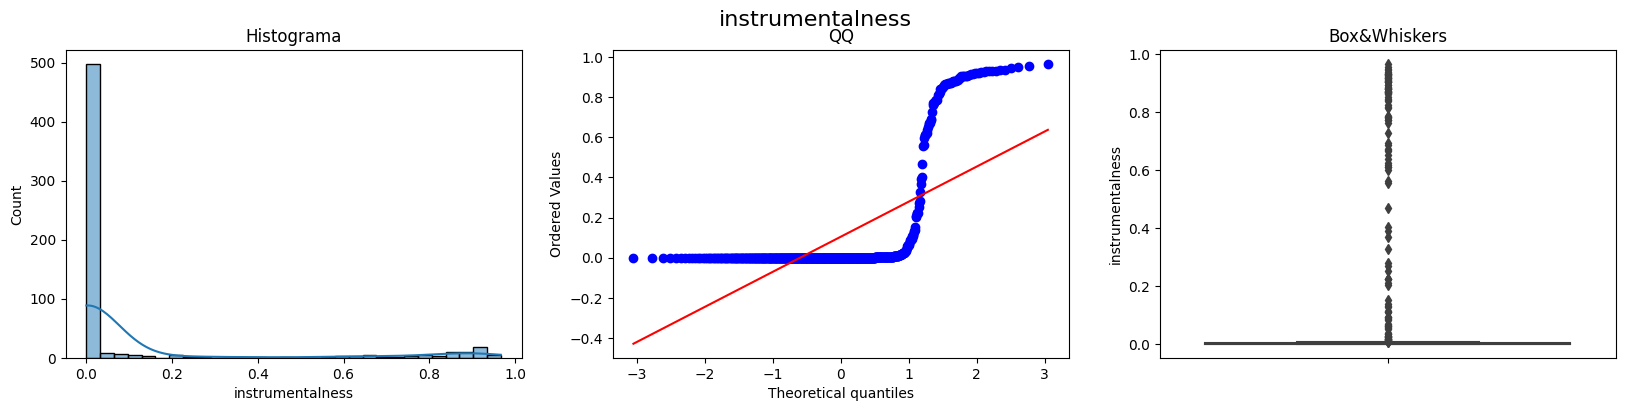

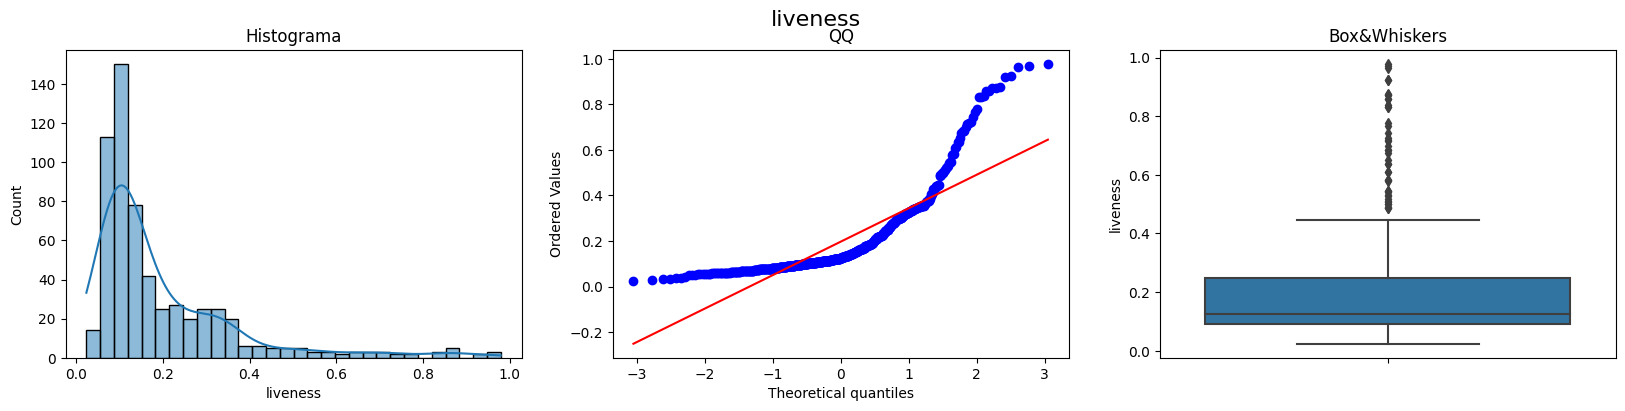

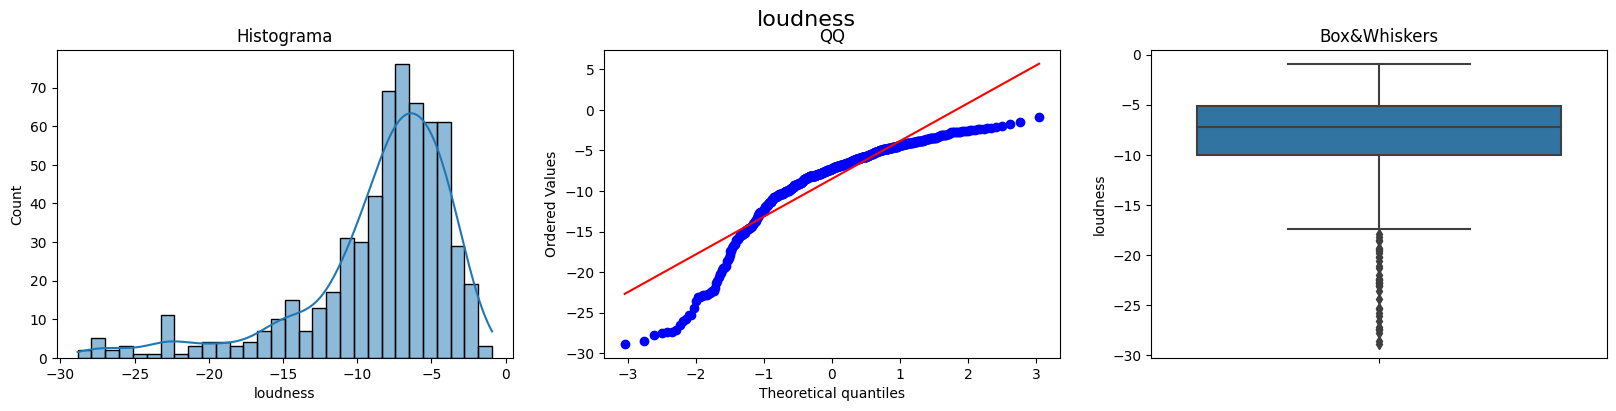

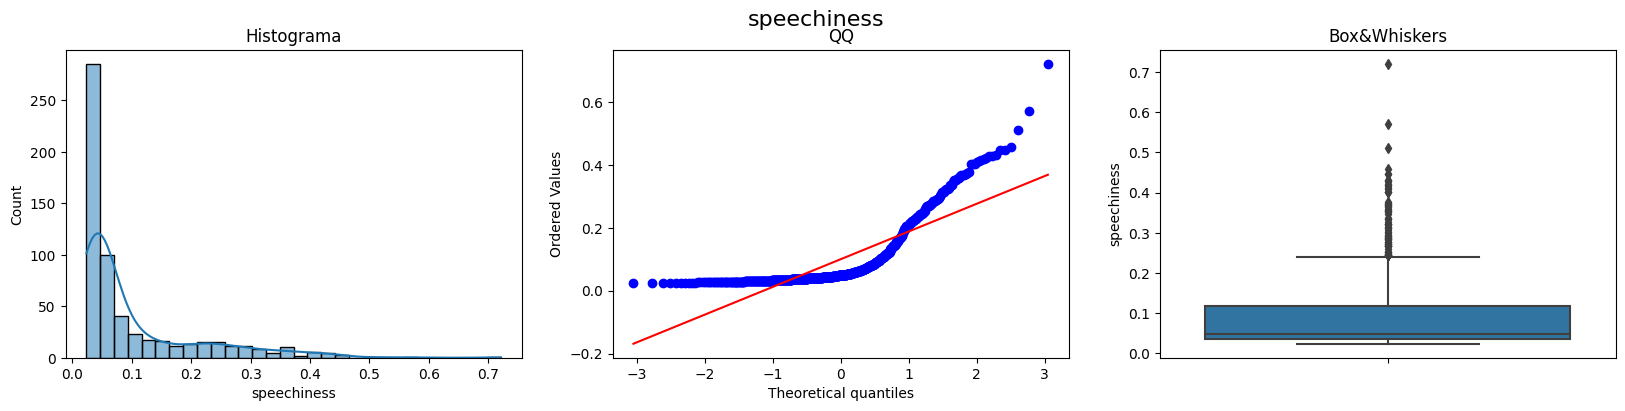

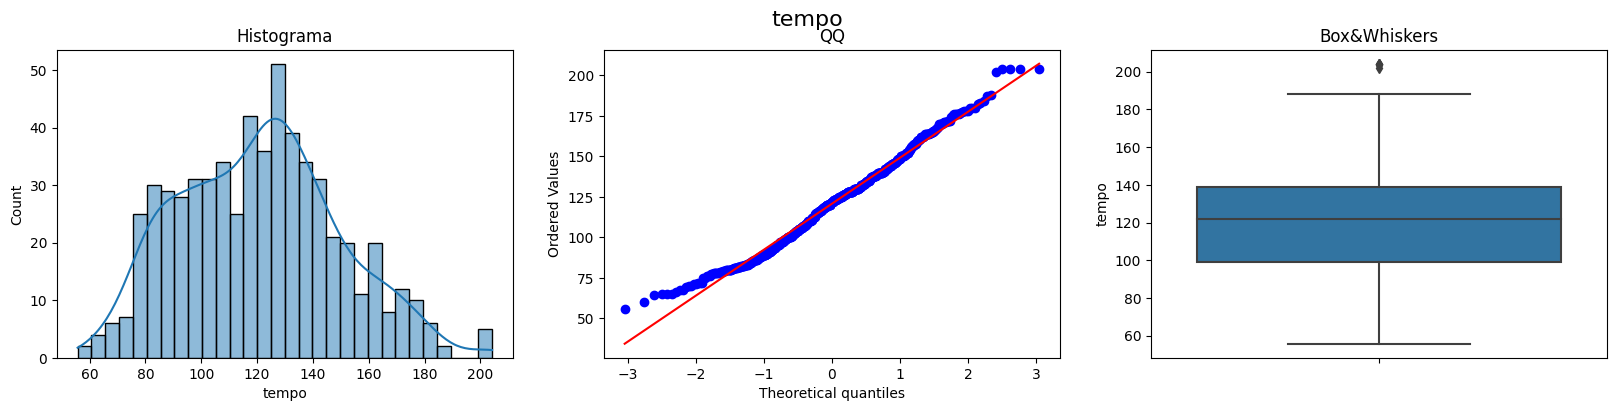

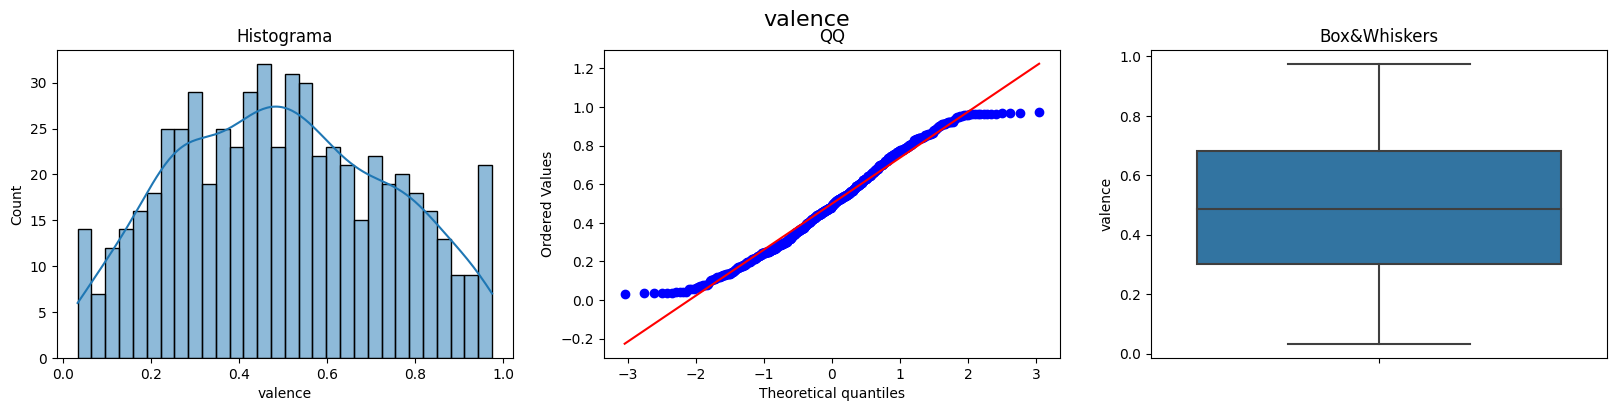

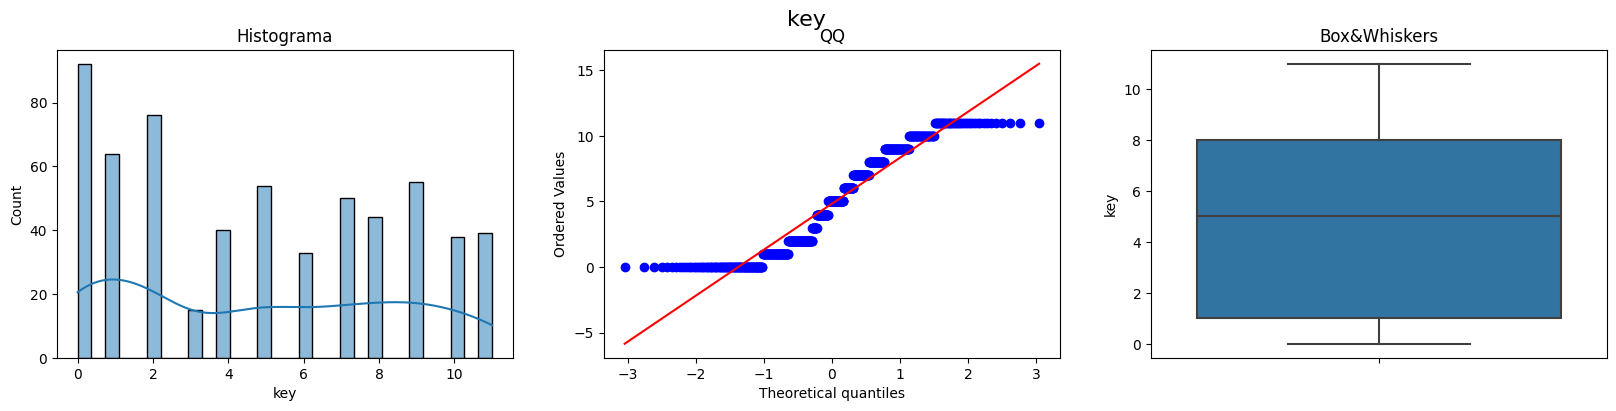

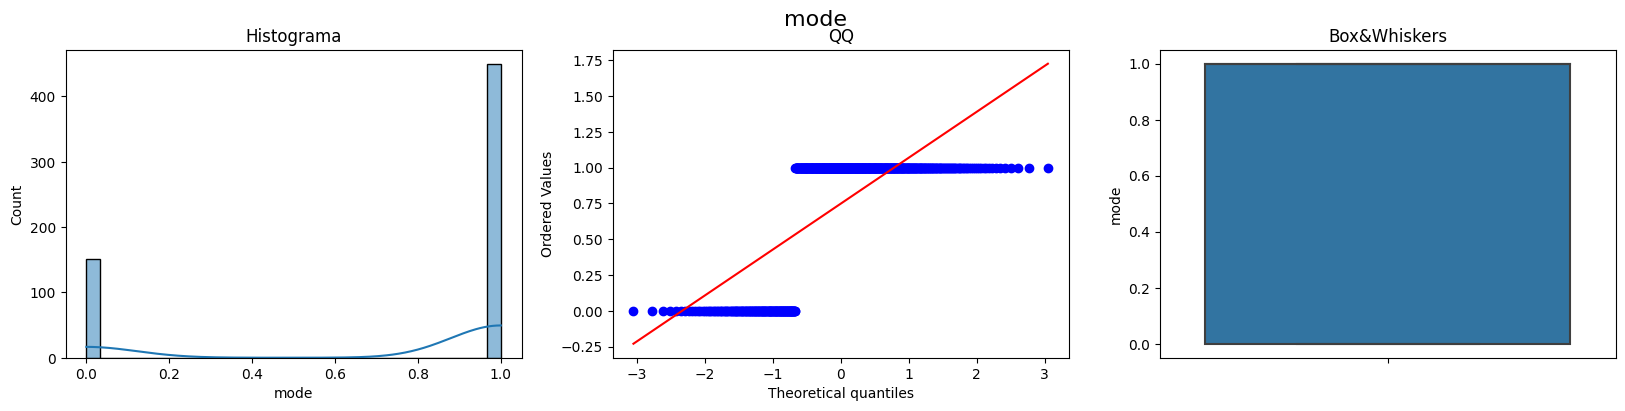

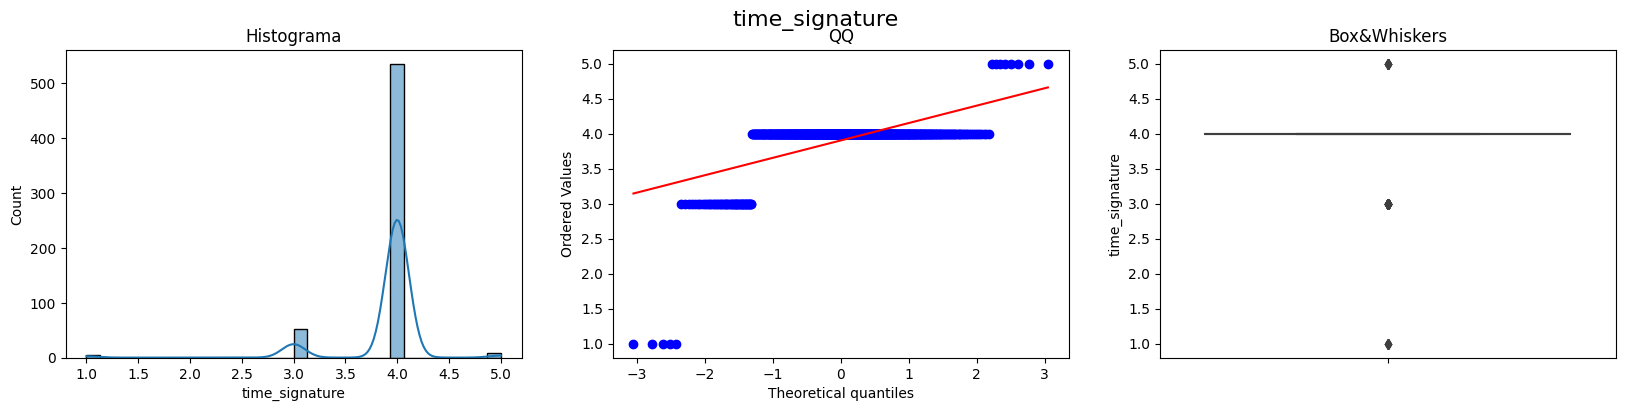

In [70]:
norm_col = [
            'acousticness',
            'danceability', 
            'duration', 
            'energy', 
            'instrumentalness',
            'liveness', 
            'loudness', 
            'speechiness', 
            'tempo', 
            'valence',
            'key',
            'mode',
            'time_signature'
]

for col in norm_col:
    outlier_diagnostic_plots(X_train, col)

In [71]:
def find_skewed_boundaries(df, variable, distance=1.5):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary
    
def transform_outliers(df, norm_col, threshold_capped=1.5, threshold_trimmed=1.8, use_manual_limits=False, 
                        upper_limit_trim=0, lower_limit_trim=0, upper_limit_cap=0, lower_limit_cap=0):
    # Trimming and capping outliers
    outliers_total = np.array(np.repeat(False,df.shape[0]))
    X_train_capped = df.copy()
    for col in norm_col:
        
        if use_manual_limits:
            upper_limit, lower_limit = upper_limit_trim, lower_limit_trim
        else:
            upper_limit, lower_limit = find_skewed_boundaries(df, col, threshold_trimmed)

        outliers = np.where(df[col] > upper_limit, True,
                            np.where(df[col] < lower_limit, True, False))                        
        outliers_total = np.logical_or(outliers_total, outliers)
        
        print(str(col) + " outliers = "+str(outliers.sum()))
        
        if use_manual_limits:
            upper_limit, lower_limit = upper_limit_cap, lower_limit_cap
        else:
            upper_limit, lower_limit = find_skewed_boundaries(df, col, threshold_capped)

        X_train_capped[col] = np.where(df[col] > upper_limit, upper_limit,
                            np.where(df[col] < lower_limit, lower_limit, X_train_capped[col]))

    print("Total outliers = "+str(outliers_total.sum()))
    X_train_trimmed = X_train_capped.loc[~(outliers_total)]

    return X_train_trimmed

acousticness outliers = 0
danceability outliers = 0
duration outliers = 29
energy outliers = 0
instrumentalness outliers = 126
liveness outliers = 36
loudness outliers = 36
speechiness outliers = 63
tempo outliers = 0
valence outliers = 0
key outliers = 0
mode outliers = 0
time_signature outliers = 65
Total outliers = 264


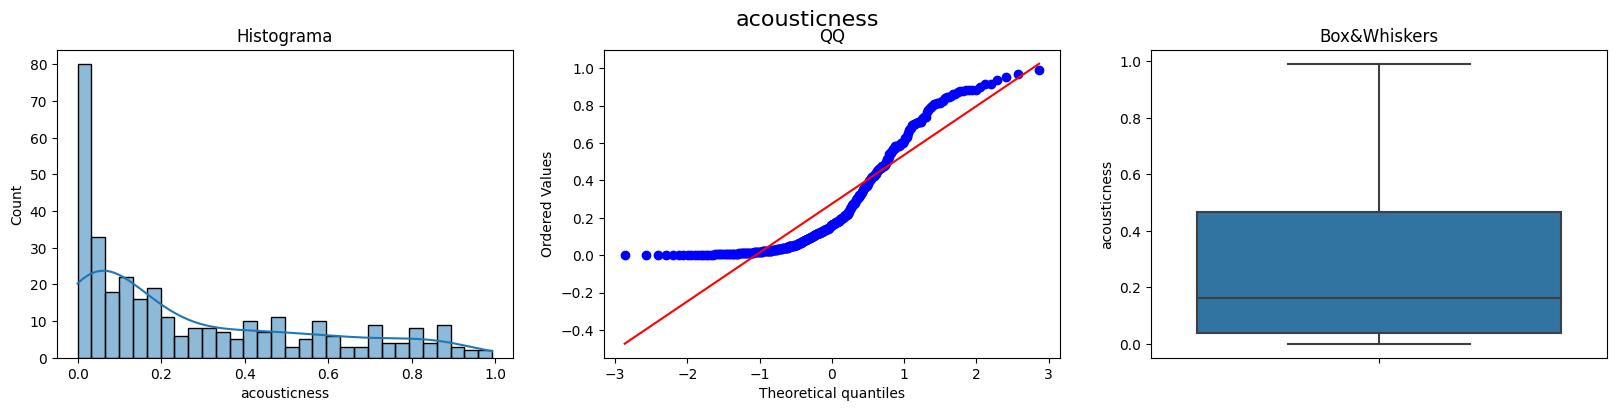

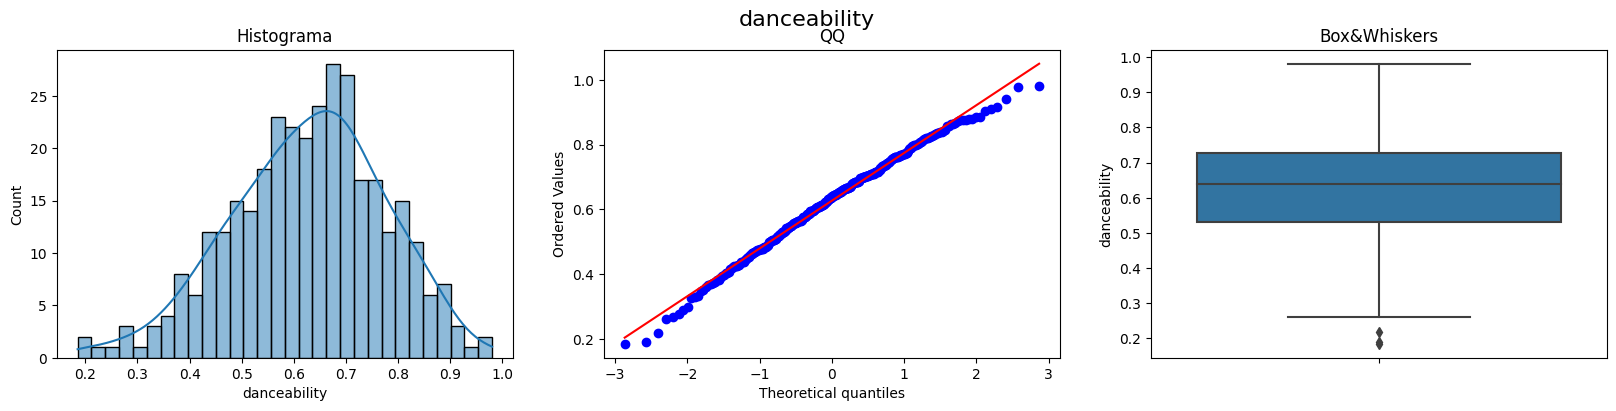

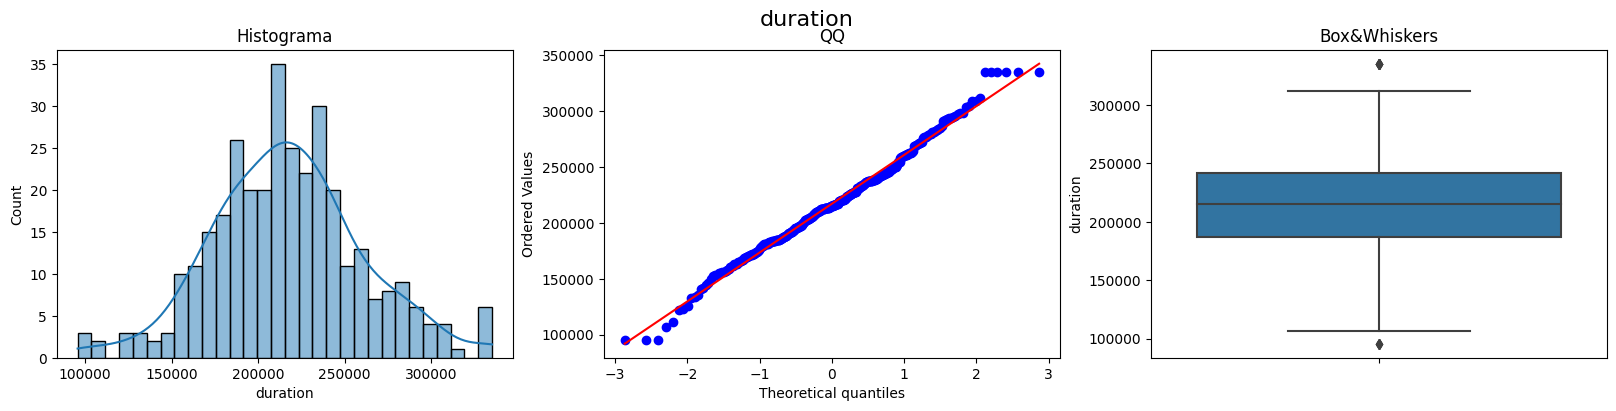

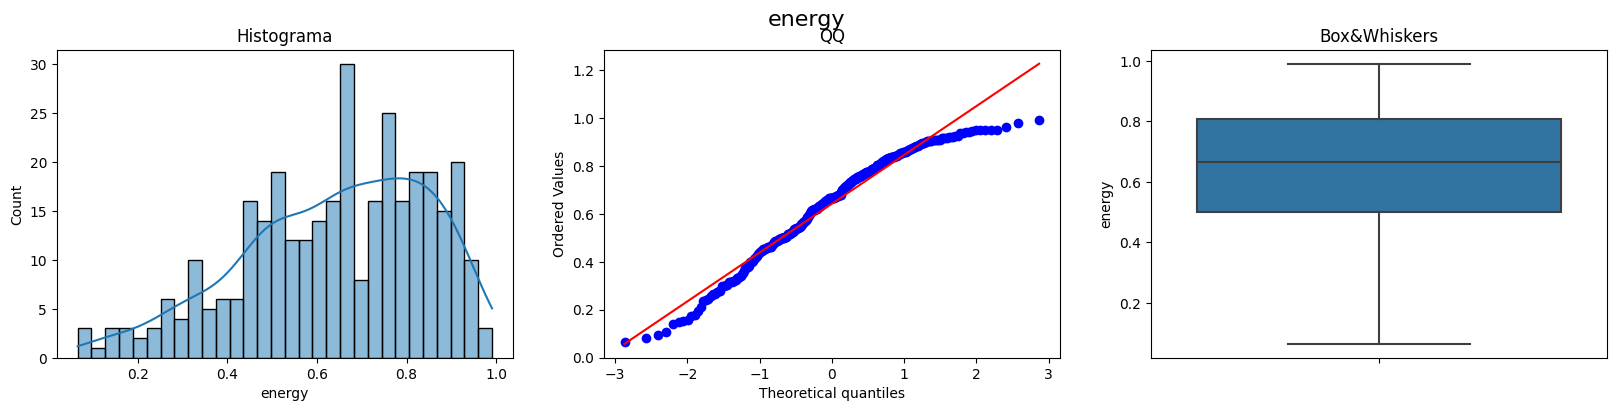

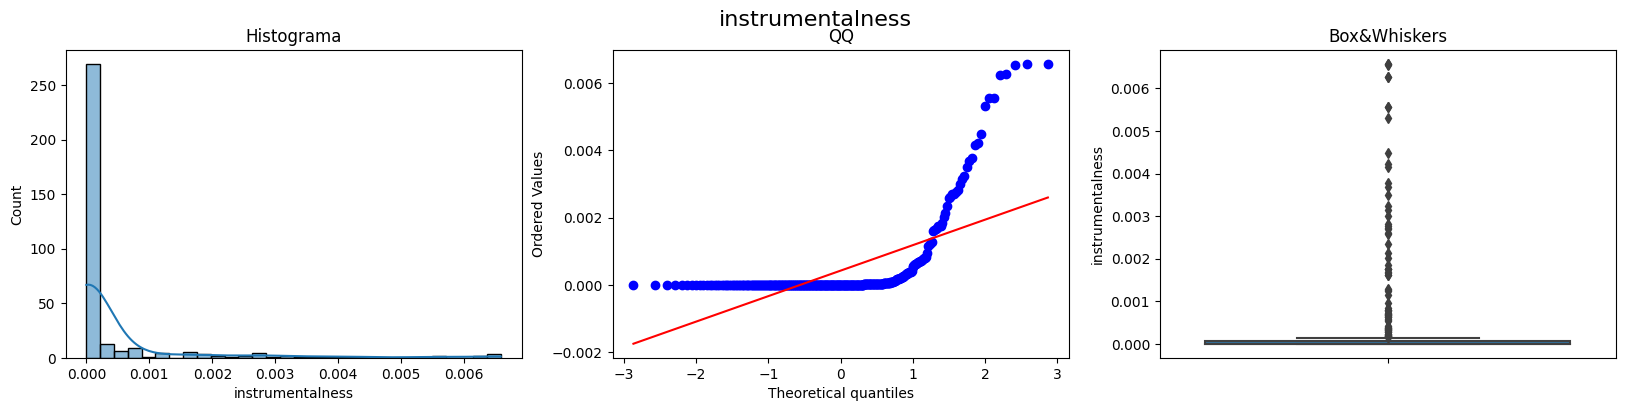

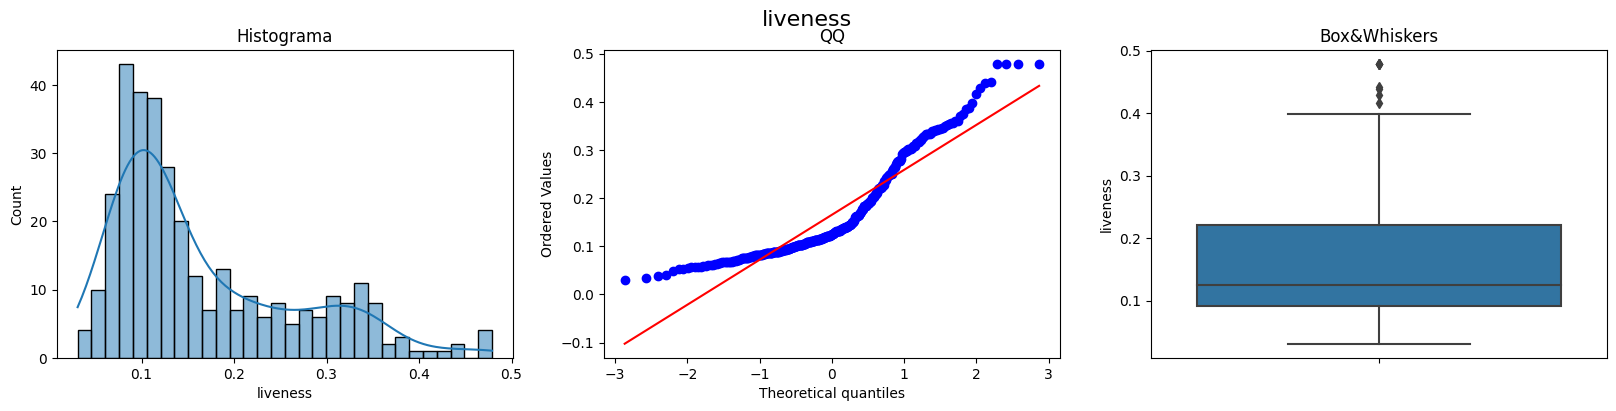

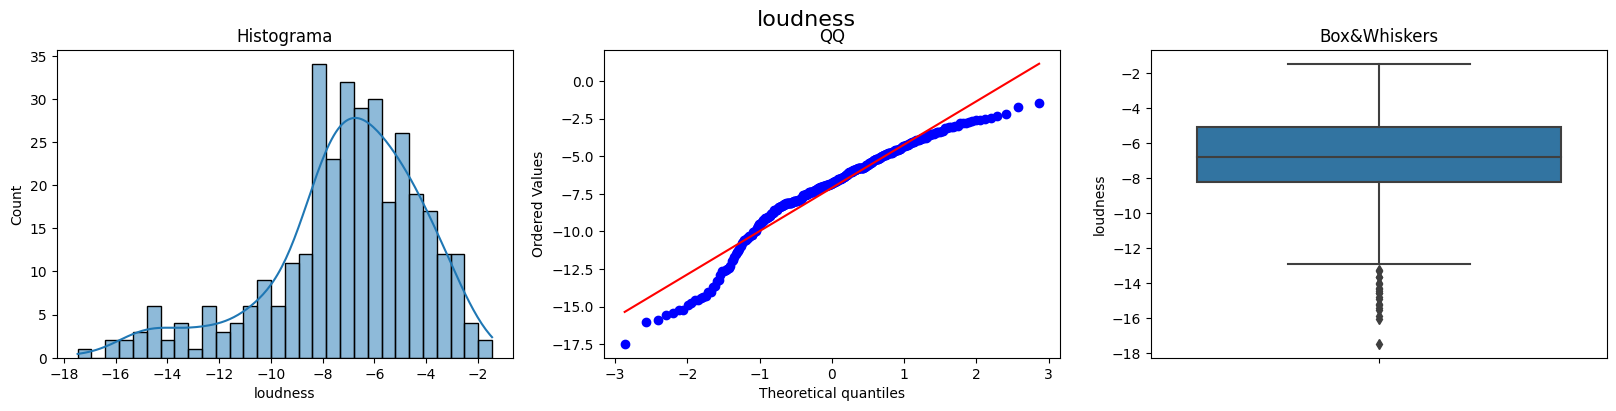

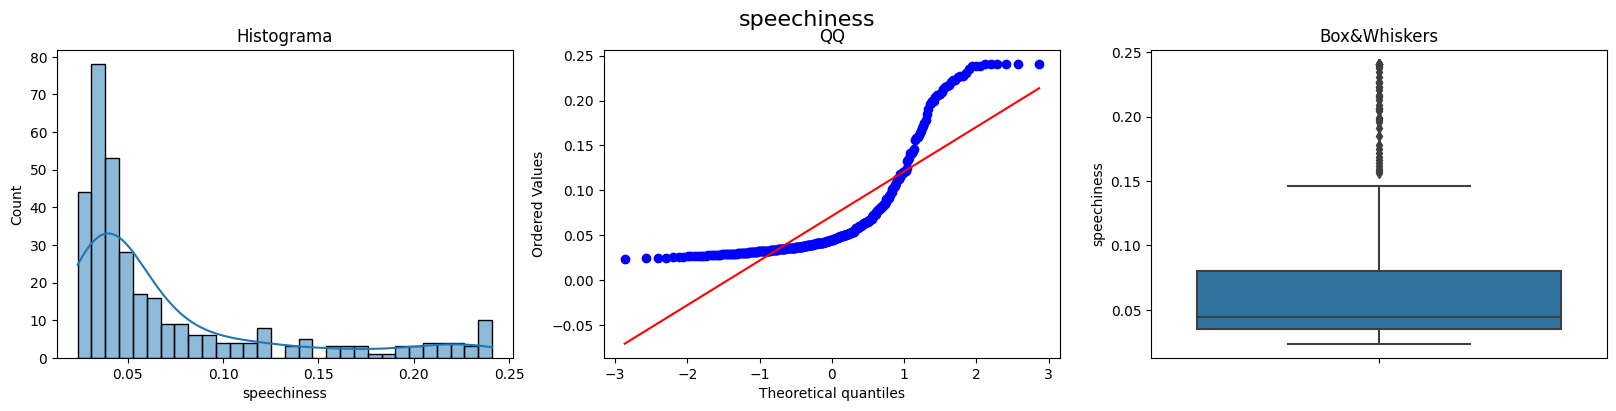

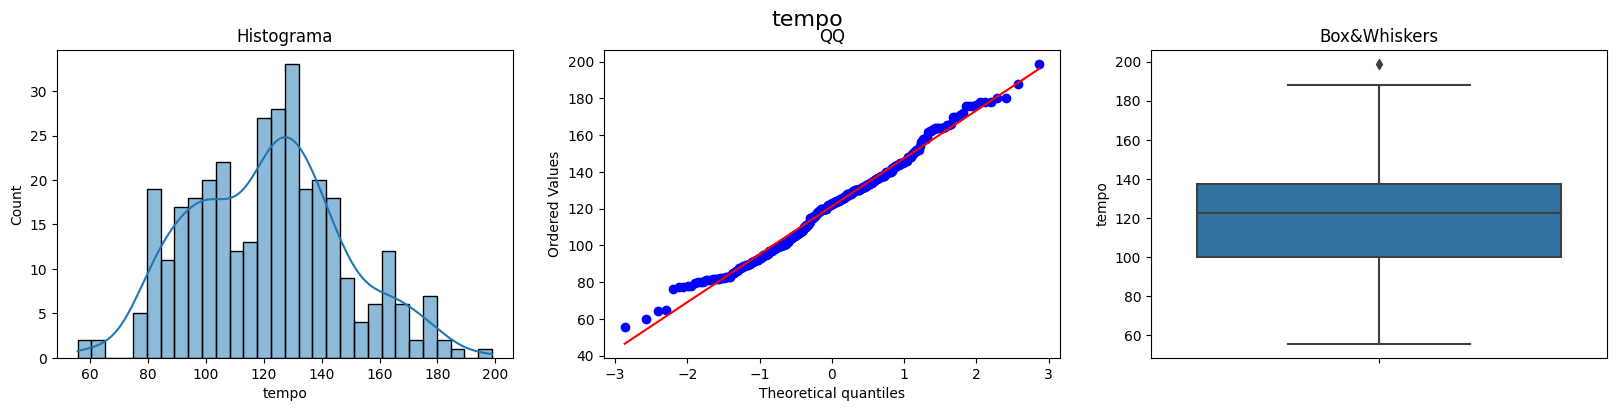

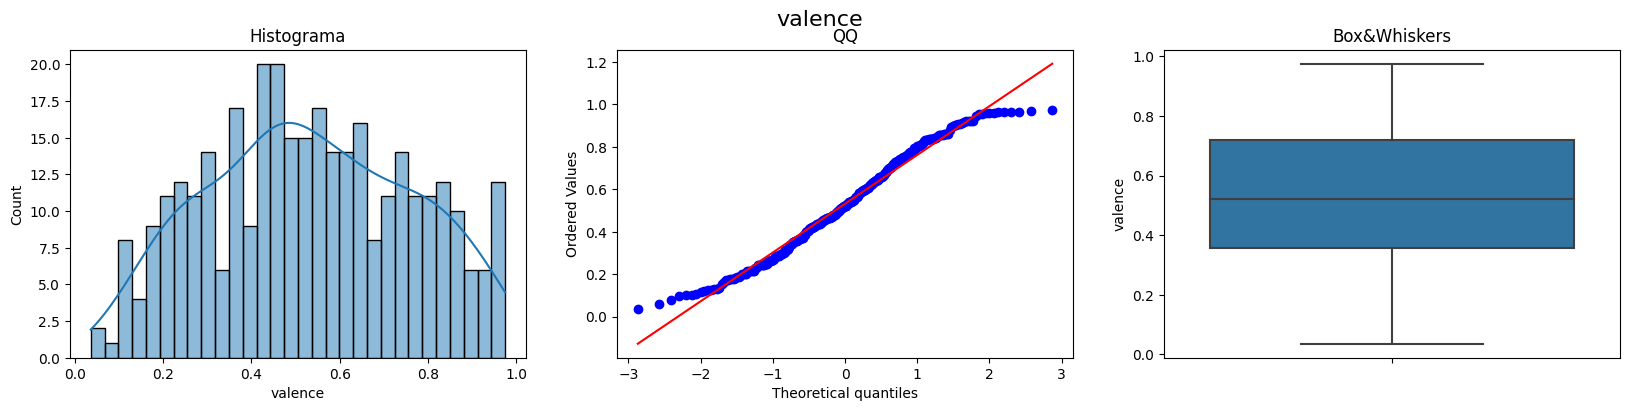

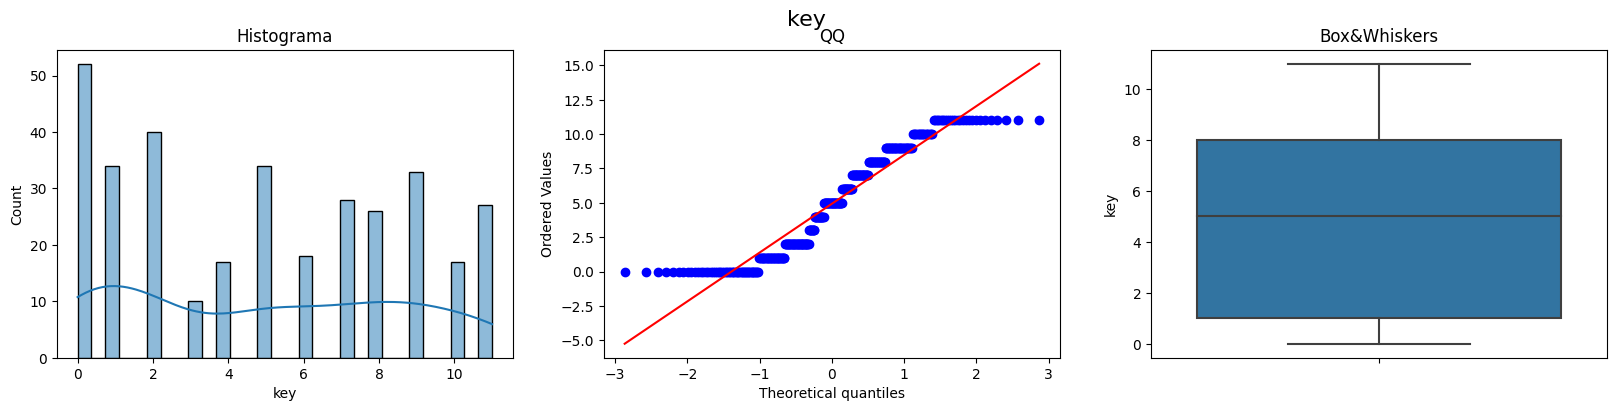

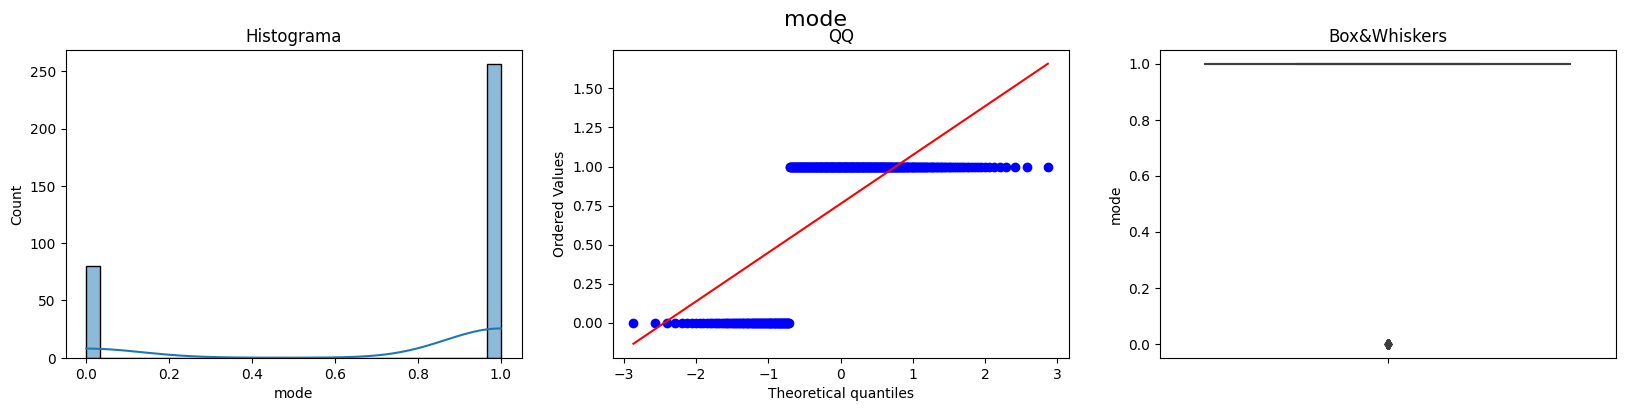

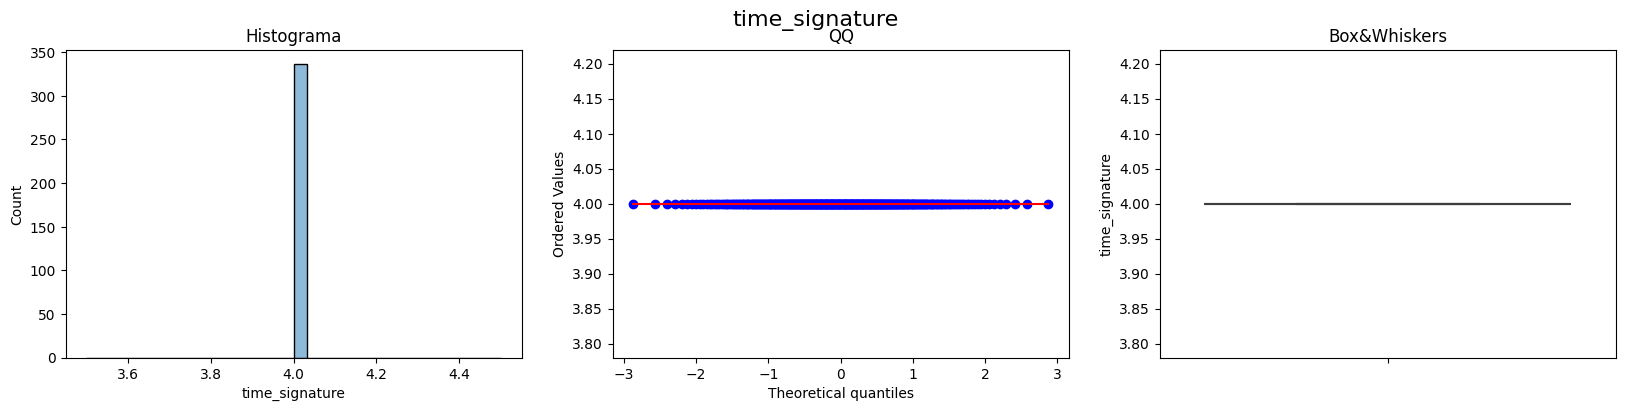

In [72]:
X_train_trimmed = transform_outliers(X_train, norm_col)

for col in norm_col:
    outlier_diagnostic_plots(X_train_trimmed, col)
    
X_train = X_train_trimmed

### Regresión Logística

In [ ]:
# Vamos a usar regresión logística porque se quiere predecir si es una clase 0 o 1
log_reg = LogisticRegression() # usamos un modelo por default

In [ ]:
# Vamos a usar todos los features numéricos para entrenar
X_train_num = X_train[numericas]
X_test_num = X_test[numericas]

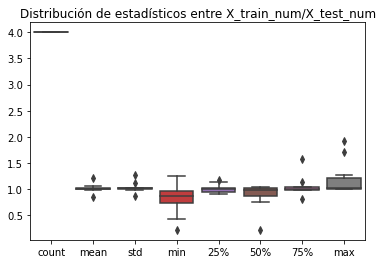

In [ ]:
to_plot = X_train_num.describe().T / X_test_num.describe().T
sns.boxplot(data=to_plot)
plt.title("Distribución de estadísticos entre X_train_num/X_test_num")
plt.show()

In [ ]:
# Entrenamos el modelo con este dataset
log_reg.fit(X_train_num, y_train)

LogisticRegression()

In [ ]:
# Predecimos los valores
y_hat = log_reg.predict(X_test_num)

In [ ]:
# Vamos a ver cómo salió la clasificación
cm = confusion_matrix(y_test, y_hat)
print(cm)

[[28 26]
 [17 79]]


In [ ]:
cr = classification_report(y_test, y_hat)
print(cr)

              precision    recall  f1-score   support

           0       0.62      0.52      0.57        54
           1       0.75      0.82      0.79        96

    accuracy                           0.71       150
   macro avg       0.69      0.67      0.68       150
weighted avg       0.71      0.71      0.71       150



In [ ]:
# Realizamos un scalado de los datos para mejorar las distribuciones numéricas
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.fit(X_test_num)

In [ ]:
# Realizamos la misma regresión logística pero con los datos escalados
log_reg_scaled = LogisticRegression()
log_reg_scaled.fit(X_train_num_scaled, y_train)

LogisticRegression()

In [ ]:
X_test_num_scaled = scaler.transform(X_test_num)

In [ ]:
# Predecimos los valores
y_hat_scaled = log_reg_scaled.predict(X_test_num_scaled)

cm = confusion_matrix(y_test, y_hat_scaled)
print("La matriz de confusión: \n", cm)

La matriz de confusión: 
 [[43 11]
 [18 78]]


In [ ]:
cr = classification_report(y_test, y_hat_scaled)
print("Reporte de clasificación: \n", cr)

Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.70      0.80      0.75        54
           1       0.88      0.81      0.84        96

    accuracy                           0.81       150
   macro avg       0.79      0.80      0.80       150
weighted avg       0.81      0.81      0.81       150



- Predice mejor los labels escalando los datos

In [ ]:
# Vamos a analizar usando también los features categóricos
X_train[categoricas].head()

,key,mode,time_signature
595,8,1,4
131,6,1,4
44,10,1,4
70,1,1,4
672,2,1,4


In [ ]:
X_train.columns

Index(['acousticness', 'danceability', 'duration', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [ ]:
# Si pasamos todos los features sin escalar los numéricos al modelo de regresión logística
log_reg_raw = LogisticRegression()
log_reg_raw.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predecimos los valores
y_hat_raw = log_reg_raw.predict(X_test)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_hat_raw)
print("La matriz de confusión: \n", cm)
print("\n")

# Calculamos el reporte de clasificación
cr = classification_report(y_test, y_hat_raw)
print("Reporte de clasificación: \n", cr)

La matriz de confusión: 
 [[ 8 46]
 [16 80]]


Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.33      0.15      0.21        54
           1       0.63      0.83      0.72        96

    accuracy                           0.59       150
   macro avg       0.48      0.49      0.46       150
weighted avg       0.53      0.59      0.54       150



In [ ]:
# Vamos a usar los datos numéricos escalados y adjuntamos los features categóricos
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=numericas)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=numericas)

In [ ]:
# X_train_raw_scaled = X_train_num_scaled.join(X_train[categoricas], how='right') --> no funciona con este join ya que se generan NaN

In [ ]:
# Adjuntamos ambos datos; la mejor forma fue ir a numpy y luego concatenar ahi
columnas = numericas+categoricas
X_train_raw_scaled = pd.DataFrame(np.concatenate((X_train_num_scaled.values, X_train[categoricas].values), axis=1), columns=columnas)

In [ ]:
# Hacemos lo mismo con el dataset de test
X_test_raw_scaled = pd.DataFrame(np.concatenate((X_test_num_scaled.values, X_test[categoricas].values), axis=1), columns=columnas)

In [ ]:
# Si pasamos este dataframe al modelo de regresión logística
log_reg_raw_scaled = LogisticRegression()
log_reg_raw_scaled.fit(X_train_raw_scaled, y_train)

# Predecimos los valores
y_hat_raw_scaled = log_reg_raw_scaled.predict(X_test_raw_scaled)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_hat_raw_scaled)
print("La matriz de confusión: \n", cm)
print("\n")

# Calculamos el reporte de clasificación
cr = classification_report(y_test, y_hat_raw_scaled)
print("Reporte de clasificación: \n", cr)

La matriz de confusión: 
 [[41 13]
 [19 77]]


Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.68      0.76      0.72        54
           1       0.86      0.80      0.83        96

    accuracy                           0.79       150
   macro avg       0.77      0.78      0.77       150
weighted avg       0.79      0.79      0.79       150



- Este modelo tiene un buen valor de score, pero sigue siendo un poco mejor solamente usar los valores numericos escalados para reg. logística.

### Analizamos este modelo de regresión logística con las variables numéricas transformadas

In [ ]:
# Definimos las variables que vamos a transformar
bc_tranformed = ['danceability', 'duration', 'energy', 'liveness', 'speechiness', 'tempo']
yj_tranformed = ['danceability', 'duration', 'energy', 'liveness', 'speechiness', 'tempo','loudness']

In [ ]:
X_train_t = X_train[bc_tranformed]
X_train_t.shape

(600, 6)

In [ ]:
X_test_t = X_test[bc_tranformed]

In [ ]:
# Realizamos la transformación
bc = PowerTransformer(method='box-cox')
X_train_t = bc.fit_transform(X_train_t)

In [ ]:
X_test_t = bc.transform(X_test_t)

In [ ]:
X_train_t = pd.DataFrame(X_train_t, columns=bc_tranformed)
X_test_t = pd.DataFrame(X_test_t, columns=bc_tranformed)

In [ ]:
# Modelamos con este dataset
log_reg_t = LogisticRegression()
log_reg_t.fit(X_train_t, y_train)

LogisticRegression()

In [ ]:
# Predecimos los valores
y_hat_t = log_reg_t.predict(X_test_t)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_hat_t)
print("La matriz de confusión: \n", cm)
print("\n")

# Calculamos el reporte de clasificación
cr = classification_report(y_test, y_hat_t)
print("Reporte de clasificación: \n", cr)

La matriz de confusión: 
 [[42 12]
 [20 76]]


Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.68      0.78      0.72        54
           1       0.86      0.79      0.83        96

    accuracy                           0.79       150
   macro avg       0.77      0.78      0.78       150
weighted avg       0.80      0.79      0.79       150



- Usando solamente los features que pueden transformarse con Box-Cox, el score queda muy similar a cuando se usa el escalado numerico y las categóricas.

In [ ]:
# Probamos ahora usando Yeo-Johnson y sumando loudness
X_train_t = X_train[yj_tranformed]
X_test_t = X_test[yj_tranformed]

yj = PowerTransformer(method='yeo-johnson')
X_train_t = yj.fit_transform(X_train_t)
X_test_t = yj.transform(X_test_t)

X_train_t = pd.DataFrame(X_train_t, columns=yj_tranformed)
X_test_t = pd.DataFrame(X_test_t, columns=yj_tranformed)

log_reg_t = LogisticRegression()
log_reg_t.fit(X_train_t, y_train)

# Predecimos los valores
y_hat_t = log_reg_t.predict(X_test_t)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_hat_t)
print("La matriz de confusión: \n", cm)
print("\n")

# Calculamos el reporte de clasificación
cr = classification_report(y_test, y_hat_t)
print("Reporte de clasificación: \n", cr)

La matriz de confusión: 
 [[42 12]
 [20 76]]


Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.68      0.78      0.72        54
           1       0.86      0.79      0.83        96

    accuracy                           0.79       150
   macro avg       0.77      0.78      0.78       150
weighted avg       0.80      0.79      0.79       150



- Mejoro un poco al agregar loudness y transformar todo con Yeo-Johnson.

## Aplicamos árbol de clasificación

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Creamos el arbol
classification = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)

In [ ]:
# Clasificamos primero con los sets sin modificaciones
classification.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# Predecimos los valores
y_hat = classification.predict(X_test)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_hat)
print("La matriz de confusión: \n", cm)
print("\n")

# Calculamos el reporte de clasificación
cr = classification_report(y_test, y_hat)
print("Reporte de clasificación: \n", cr)

La matriz de confusión: 
 [[35 19]
 [20 76]]


Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.64      0.65      0.64        54
           1       0.80      0.79      0.80        96

    accuracy                           0.74       150
   macro avg       0.72      0.72      0.72       150
weighted avg       0.74      0.74      0.74       150



- Con el árbol de clasificación sin hacer ningún tipo de modificación en los datos, tenemos el mejor score de todos los realizados con regresión logística.

## Vemos random forests

In [ ]:
rand_for = RandomForestClassifier(criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
rand_for.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [ ]:
# Predecimos los valores
y_hat = rand_for.predict(X_test)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_hat)
print("La matriz de confusión: \n", cm)
print("\n")

# Calculamos el reporte de clasificación
cr = classification_report(y_test, y_hat)
print("Reporte de clasificación: \n", cr)

La matriz de confusión: 
 [[43 11]
 [13 83]]


Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.77      0.80      0.78        54
           1       0.88      0.86      0.87        96

    accuracy                           0.84       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.84      0.84      0.84       150



- Se obtiene así el mejor valor de score hasta el momento.

Modelo con todos los atributos AUC: 0.8974729938271605


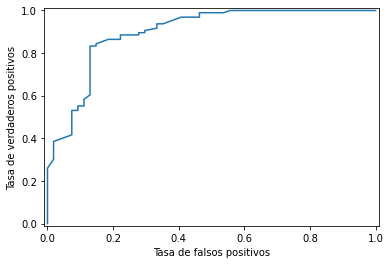

In [ ]:
# Calculamos la probabilidad del modelo
prob_total = rand_for.predict_proba(X_test)[:, -1] # para llevarlo a 1-d

# Realizamos la curva roc
fpr_total, tpr_total, _ = roc_curve(y_true=y_test, y_score=prob_total)

# Ploteamos la curva
plt.plot(fpr_total, tpr_total, label="Modelo todos los atributos")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")

# Calculamos el auc
print(f"Modelo con todos los atributos AUC: {auc(fpr_total, tpr_total)}")

In [ ]:
# Usamos Gini como criterio 
rand_for_gini = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
rand_for_gini.fit(X_train, y_train)

# Predecimos los valores
y_hat = rand_for_gini.predict(X_test)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_hat)
print("La matriz de confusión: \n", cm)
print("\n")

# Calculamos el reporte de clasificación
cr = classification_report(y_test, y_hat)
print("Reporte de clasificación: \n", cr)

La matriz de confusión: 
 [[44 10]
 [14 82]]


Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.76      0.81      0.79        54
           1       0.89      0.85      0.87        96

    accuracy                           0.84       150
   macro avg       0.82      0.83      0.83       150
weighted avg       0.84      0.84      0.84       150



Modelo con todos los atributos AUC: 0.9048996913580247


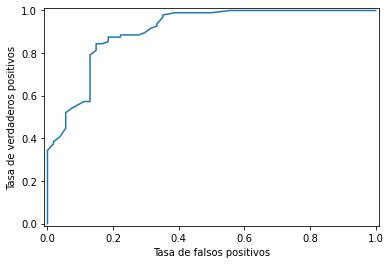

In [ ]:
# Calculamos la probabilidad del modelo
prob_total_gini = rand_for_gini.predict_proba(X_test)[:, -1] # para llevarlo a 1-d

# Realizamos la curva roc
fpr_total, tpr_total, _ = roc_curve(y_true=y_test, y_score=prob_total_gini)

# Ploteamos la curva
plt.plot(fpr_total, tpr_total, label="Modelo todos los atributos")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")

# Calculamos el auc
print(f"Modelo con todos los atributos AUC: {auc(fpr_total, tpr_total)}")

 - Mejora el área bajo la curva roc con el criterio de gini.

## Adaboost classifier

In [ ]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
# Predecimos los valores
y_hat = ada.predict(X_test)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_hat)
print("La matriz de confusión: \n", cm)
print("\n")

# Calculamos el reporte de clasificación
cr = classification_report(y_test, y_hat)
print("Reporte de clasificación: \n", cr)

La matriz de confusión: 
 [[40 14]
 [20 76]]


Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.67      0.74      0.70        54
           1       0.84      0.79      0.82        96

    accuracy                           0.77       150
   macro avg       0.76      0.77      0.76       150
weighted avg       0.78      0.77      0.78       150



- Empeoró, pero probablemente se deba a que está mal aplicado.

## Aplicamos KNN Classifier

In [ ]:
# Usamos los datos escalados para usar este tipo de clasificador
classifier_knn_total = KNeighborsClassifier(n_neighbors=9, metric="minkowski", p=2)
classifier_knn_total.fit(X_train_raw_scaled, y_train)

KNeighborsClassifier(n_neighbors=9)

La matriz de confusión: 
 [[36 18]
 [ 8 88]]


Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.82      0.67      0.73        54
           1       0.83      0.92      0.87        96

    accuracy                           0.83       150
   macro avg       0.82      0.79      0.80       150
weighted avg       0.83      0.83      0.82       150

Modelo con todos los atributos AUC: 0.8603395061728395


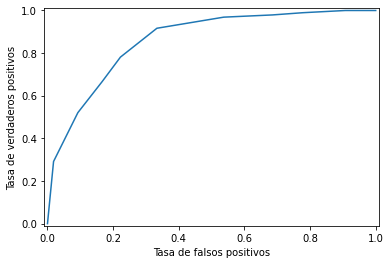

In [ ]:
# Predecimos los valores
y_hat_KNN = classifier_knn_total.predict(X_test_raw_scaled)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_hat_KNN)
print("La matriz de confusión: \n", cm)
print("\n")

# Calculamos el reporte de clasificación
cr = classification_report(y_test, y_hat_KNN)
print("Reporte de clasificación: \n", cr)

# Calculamos la probabilidad del modelo
prob_total_KNN = classifier_knn_total.predict_proba(X_test_raw_scaled)[:, -1] # para llevarlo a 1-d

# Realizamos la curva roc
fpr_total, tpr_total, _ = roc_curve(y_true=y_test, y_score=prob_total_KNN)

# Ploteamos la curva
plt.plot(fpr_total, tpr_total, label="Modelo todos los atributos")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")

# Calculamos el auc
print(f"Modelo con todos los atributos AUC: {auc(fpr_total, tpr_total)}")

- Elegimos un valor de 9 porque fue uno de los primeros valores mayores que obtuvimos. No es tan mal clasificador.

## Aplicamos SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Podemos aprovechar hacer una SVM lineal con gridsearch
svm_linear = SVC(kernel='linear', probability=True)

grid = GridSearchCV(svm_linear,
                    {"C": [0.001, 0.01, 0.1, 1, 5, 10, 100]},
                    refit=True,
                    cv=5,
                    scoring='accuracy')
grid.fit(X_train_num_scaled, y_train)

# Vemos el mejor valor de parámetro
grid.best_params_

{'C': 0.01}

La matriz de confusión: 
 [[41 13]
 [16 80]]


Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.72      0.76      0.74        54
           1       0.86      0.83      0.85        96

    accuracy                           0.81       150
   macro avg       0.79      0.80      0.79       150
weighted avg       0.81      0.81      0.81       150

Modelo con todos los atributos AUC: 0.8777006172839507


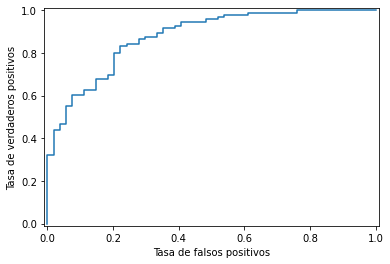

In [ ]:
# Usamos para calcular el mejor estimador
svm_best = grid.best_estimator_

# Predecimos los valores
y_hat_svm = svm_best.predict(X_test_num_scaled)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_hat_svm)
print("La matriz de confusión: \n", cm)
print("\n")

# Calculamos el reporte de clasificación
cr = classification_report(y_test, y_hat_svm)
print("Reporte de clasificación: \n", cr)

# Calculamos la probabilidad del modelo
prob_total_svm = svm_best.predict_proba(X_test_num_scaled)[:, -1] # para llevarlo a 1-d

# Realizamos la curva roc
fpr_total, tpr_total, _ = roc_curve(y_true=y_test, y_score=prob_total_svm)

# Ploteamos la curva
plt.plot(fpr_total, tpr_total, label="Modelo todos los atributos")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")

# Calculamos el auc
print(f"Modelo con todos los atributos AUC: {auc(fpr_total, tpr_total)}")

In [ ]:
# Podemos aprovechar hacer una SVM lineal con gridsearch
svm_linear = SVC(kernel='rbf', probability=True)

grid = GridSearchCV(svm_linear,
                    {"C": [0.001, 0.01, 0.1, 1, 5, 10, 100]},
                    refit=True,
                    cv=5,
                    scoring='accuracy')
grid.fit(X_train_num_scaled, y_train)

# Vemos el mejor valor de parámetro
grid.best_params_

{'C': 5}

La matriz de confusión: 
 [[44 10]
 [15 81]]


Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.75      0.81      0.78        54
           1       0.89      0.84      0.87        96

    accuracy                           0.83       150
   macro avg       0.82      0.83      0.82       150
weighted avg       0.84      0.83      0.83       150

Modelo con todos los atributos AUC: 0.8755787037037037


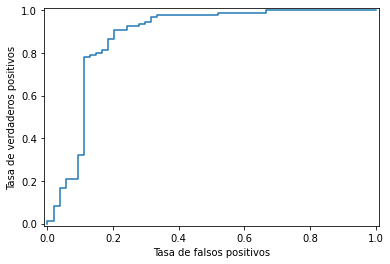

In [ ]:
# Usamos para calcular el mejor estimador
svm_best = grid.best_estimator_

# Predecimos los valores
y_hat_svm = svm_best.predict(X_test_num_scaled)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_hat_svm)
print("La matriz de confusión: \n", cm)
print("\n")

# Calculamos el reporte de clasificación
cr = classification_report(y_test, y_hat_svm)
print("Reporte de clasificación: \n", cr)

# Calculamos la probabilidad del modelo
prob_total_svm = svm_best.predict_proba(X_test_num_scaled)[:, -1] # para llevarlo a 1-d

# Realizamos la curva roc
fpr_total, tpr_total, _ = roc_curve(y_true=y_test, y_score=prob_total_svm)

# Ploteamos la curva
plt.plot(fpr_total, tpr_total, label="Modelo todos los atributos")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")

# Calculamos el auc
print(f"Modelo con todos los atributos AUC: {auc(fpr_total, tpr_total)}")